# Capstone Two: The Gold Standard

Everyone likes a sure thing. The difficulty is in identifying a sure thing, as famously it has been said the only sure things are death and taxes. This, however, does not prevent analysts the world over from attempting to provide guarantees on a number of variables (usually by request, since most analysts can agree complete guarantee is almost always impossible).

During times of high financial uncertainty, investors seek to identify investments most likely to secure a profit. In short, they seek what everyone does: stability. And while such an answer is beyond the scope of this project, there is one investment which traditionally is considered safe, even among safe investments. Emperors, kings, armies, governments, banks, investment groups, even today have taken to a heavy investment in gold as the foundation for their social structures.

Is gold, then, a worthwhile investment when financial markets are unstable?
When times are tough, should I buy any gold I can find, or sell any gold I have?

Let's find out together.

# NYSE v NASDAQ

The USA has many measures for economic growth, and while a complete analysis of all of them would certainly have been enlightening, this analyst will leave that sort of work to Ivy League Economy Majors. Two indexes have been chosen to use as benchmarks when analyzing the gold market, those being the New York Stock Exchange (NYSE) and the National Association of Securities Dealers Automated Quotations System (NASDAQ).

While there are many subtle and important differences between the two, for the purposes of this capstone project the only differentiator is what's being measured by each index: the NYSE is comprised of individuals buying and selling auction-style, while the NASDAQ is a dealer's market where banks and brokerage firms post at what price they are willing to buy or sell a stock.

Therefore when the NYSE comes into question, the speculation pattern of individual people waving tickets in their hands shouting wildly inside a building on Wall Street is the image of what should come to mind, while the NASDAQ refers more closely to business suits in high-rise boardrooms shaking hands behind curtains.

# First Things First

Let's import the tools and libraries we need to get this thing underway.

The following tools have been imported:

1. Matplotlib - Python's basic plotting library.
2. Numpy - For the easy creation of multidimensional arrays.
3. Seaborn - For beautiful, aesthetically pleasing plots.
4. Pandas - For viewing and manipulating  data in a tabular format.
5. statsmodel.api - For the creation of statistical models. Useful when performing regession analysis.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Data Cleaning

This section will detail all the data cleaning and transforming I do to get a working dataset.

We are primarily working with three main datasets:

1. The price of gold.
2. The NASDAQ price.
3. The NYSE price.

As active markets and indexes, each individual dataset fluctuates wildly on a daily basis, however individual timestamp values could not be readily sourced for this project. Therefore, only the closing price for each variable will be observed.

In [2]:
#bad_nyd = pd.read_csv(r'C:\Users\Of\Desktop\Capstone Two\NYSE_NASDAQ\NYSE_Daily.csv', header=0)
#bad_nyd['Date'] = pd.to_datetime(bad_nyd['Date'])
#bad_nyd.set_index('Date', inplace=True)

#print(bad_nyd)
#print(bad_nyd.info())

#bad_nyd['NY Day'] = bad_nyd['NY Day'].astype(str)
#bad_nyd['NY Day'] = bad_nyd['NY Day'].str.replace(',','').astype(float)
#sns.lineplot(data=bad_nyd,x=bad_nyd.index,y='NY Day')
#plt.show()
#print(bad_nyd.info())

ny_d = pd.read_excel(r'C:\Users\Of\Desktop\Capstone Two\NYSE_NASDAQ\ny_d.xlsx', header=0)
ny_d['Date'] = pd.to_datetime(ny_d['Date'])
ny_d.set_index('Date', inplace=True)
nas_d = pd.read_excel(r'C:\Users\Of\Desktop\Capstone Two\NYSE_NASDAQ\nas_d.xlsx', header=0)
nas_d['Date'] = pd.to_datetime(nas_d['Date'])
nas_d.set_index('Date', inplace=True)
gold = pd.read_excel(r'C:\Users\Of\Desktop\Capstone Two\NYSE_NASDAQ\gold.xlsx', header=0)
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date', inplace=True)

prices = ny_d.join([nas_d, gold], how='inner')

ny = prices['NYSE']
nas = prices['NASDAQ']
markets = prices[['NYSE','NASDAQ']]
gold = prices[['Gold']]


print(prices)
print(prices.info())
print(prices.describe())

                NYSE   NASDAQ     Gold
Date                                  
1978-12-29    566.96   117.98   226.00
1979-01-02    570.24   117.84   226.80
1979-01-03    577.01   119.11   218.60
1979-01-04    582.08   120.66   223.15
1979-01-05    585.89   122.05   225.50
...              ...      ...      ...
2020-03-30  10434.74  7774.15  1618.30
2020-03-31  10301.87  7700.10  1608.95
2020-04-01   9844.85  7360.58  1576.55
2020-04-02  10062.37  7487.31  1616.80
2020-04-03   9880.63  7373.08  1613.10

[10406 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10406 entries, 1978-12-29 to 2020-04-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NYSE    10406 non-null  float64
 1   NASDAQ  10406 non-null  float64
 2   Gold    10406 non-null  float64
dtypes: float64(3)
memory usage: 325.2 KB
None
               NYSE        NASDAQ          Gold
count  10406.000000  10406.000000  10406.000000
mean    5414.5

# EDA: Exploratory Data Analysis

This is where we will perform data exploration in order to understand trends related to the problem statement and issue tree.

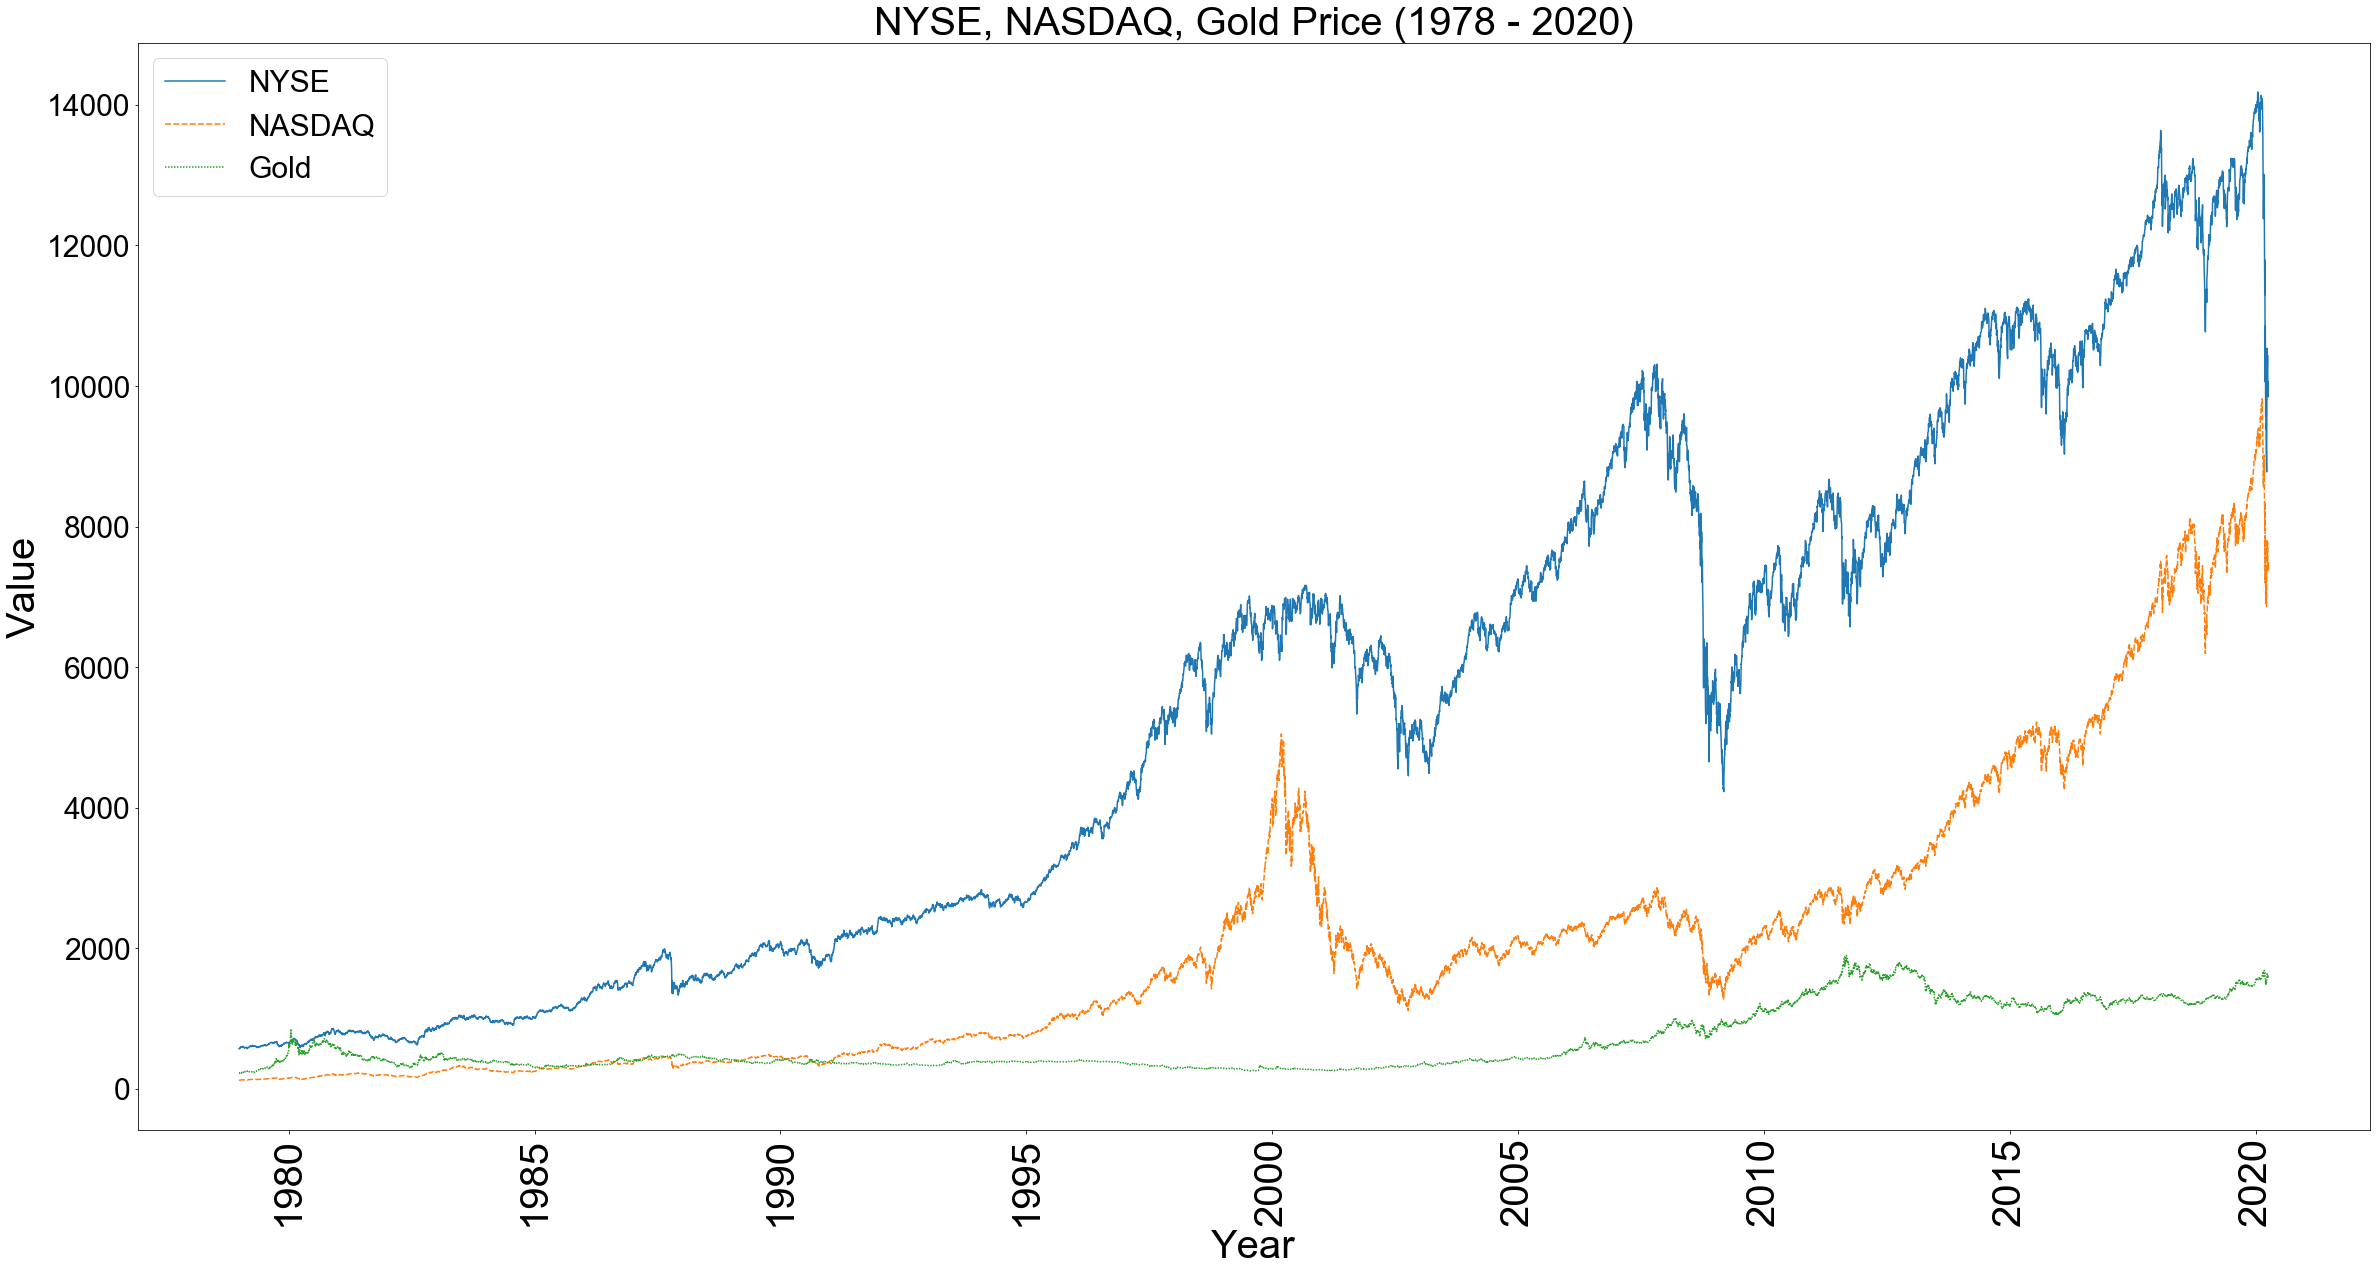

In [3]:
plt.figure(figsize=(40,20))
plt.title("NYSE, NASDAQ, Gold Price (1978 - 2020)", size=40)
sns.lineplot(data=prices)
plt.legend(fontsize=30)
sns.set()
plt.xticks(rotation=90, size=40)
plt.yticks(size=30)
plt.xlabel('Year', size=40)
plt.ylabel('Value', size=40)
plt.show()

For the remainder of this project, blue will represent the NYSE, orange will represent the NASDAQ, and green will represent the gold price.

At a glance, the above chart shows the same pattern for all indexes: a general upward trend with moments of extreme variation. The wide range of values makes the application of descriptive statistics difficult to meaningfully interpret across the entire dataset, therefore descriptive analytics will be laid out over specifically identified ranges of time inclusive of these exceptional variations in price.

Looking at each variable individually, our first step is to identify when these exceptional variations occur and--to the best of our ability--explain those variances with historical context to understand the underlying cause. The peaks and troughs of these variables, coupled with the time each instance takes to stabilize, should helps us better understand not only why the market shifts, but how the market behaves during these periods.

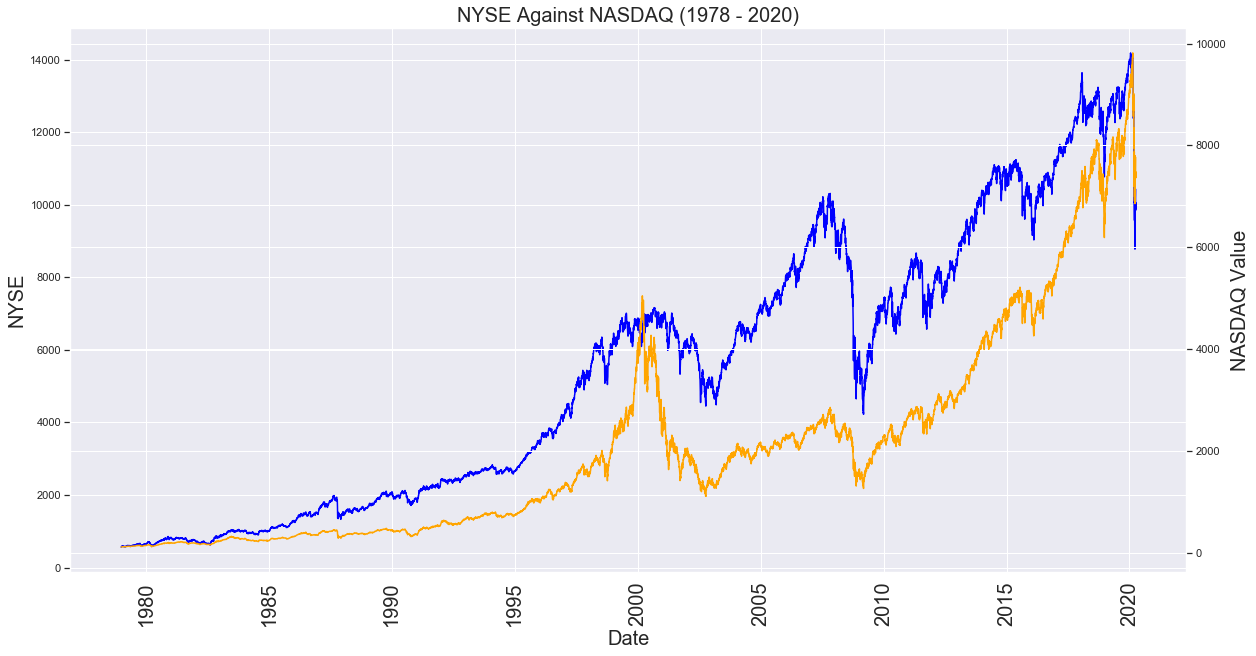

In [4]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(markets['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=20)
ax1.set_ylabel("NYSE", size=20)
axtwo = ax1.twinx()
plt.title("NYSE Against NASDAQ (1978 - 2020)", size=20)
axtwo.plot(markets['NASDAQ'], color='orange')
axtwo.set_ylabel("NASDAQ Value", size=20)

plt.show()

The six largest market variations are referred to as:

1. Black Monday: October 1987
2. Dot Com Bubble: March 2000
3. Eurozone Debt Crisis: April 2010
4. 2015 Market Selloff: August 2015
5. 2018 Global Downturn: September 2018
6. 2020 Crash: February 2020

In [5]:
bm = prices["1987-04-01":"1989-04-01"]
dcb = prices["1999-04-01":"2005-04-01"]
euro = prices["2008-04-01":"2010-04-01"]
ms15 = prices["2015-03-01":"2017-03-01"]
gd18 = prices["2018-07-01":"2019-07-01"]
covid = prices["2020-01-01":"2020-04-03"]

A visual reference of market behavior during these times reveals the following trends:

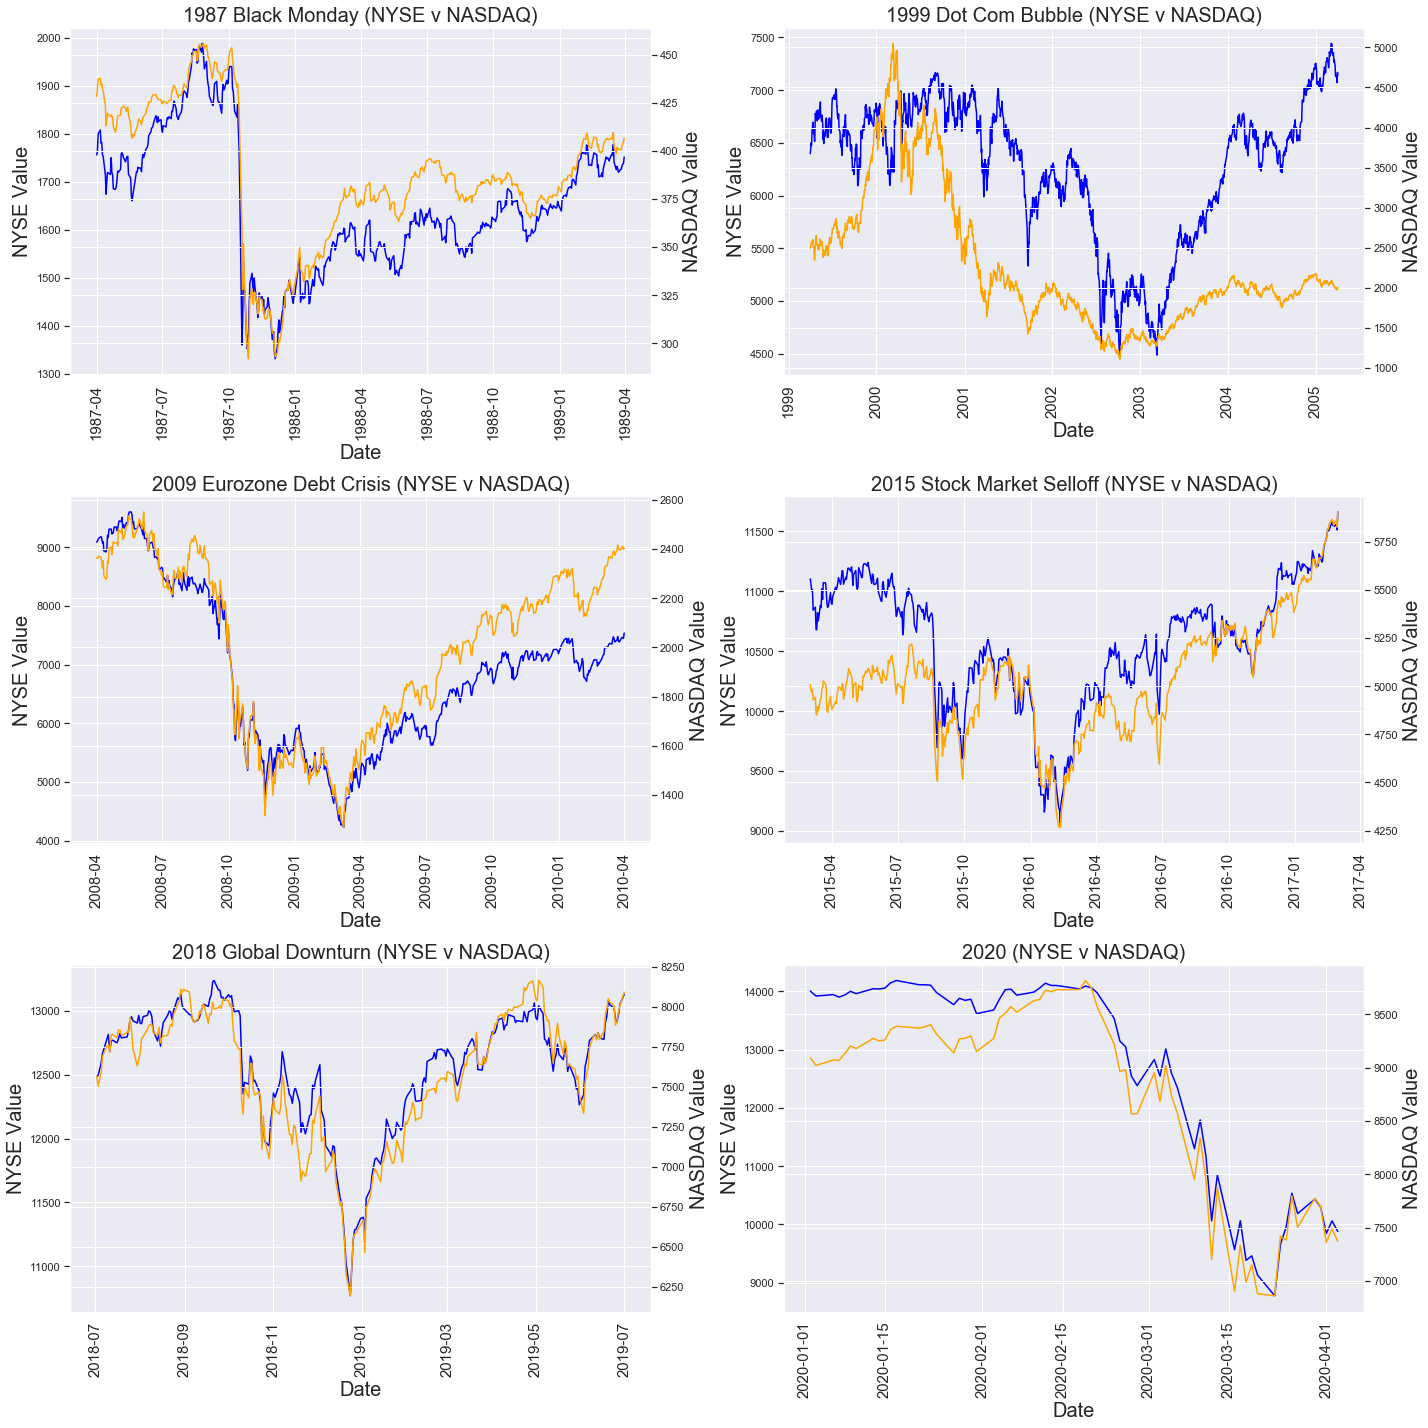

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))

ax1.plot(bm['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NYSE Value", size=20)
axa = ax1.twinx()
plt.title("1987 Black Monday (NYSE v NASDAQ)", size=20)
axa.plot(bm['NASDAQ'], color='orange')
axa.set_ylabel("NASDAQ Value", size=20)

ax2.plot(dcb['NYSE'], color='blue')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NYSE Value", size=20)
axb = ax2.twinx()
plt.title("1999 Dot Com Bubble (NYSE v NASDAQ)", size=20)
axb.plot(dcb['NASDAQ'], color='orange')
axb.set_ylabel("NASDAQ Value", size=20)

ax3.plot(euro['NYSE'], color='blue')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NYSE Value", size=20)
axc = ax3.twinx()
plt.title("2009 Eurozone Debt Crisis (NYSE v NASDAQ)", size=20)
axc.plot(euro['NASDAQ'], color='orange')
axc.set_ylabel("NASDAQ Value", size=20)

ax4.plot(ms15['NYSE'], color='blue')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NYSE Value", size=20)
axd = ax4.twinx()
plt.title("2015 Stock Market Selloff (NYSE v NASDAQ)", size=20)
axd.plot(ms15['NASDAQ'], color='orange')
axd.set_ylabel("NASDAQ Value", size=20)

ax5.plot(gd18['NYSE'], color='blue')
ax5.set_xlabel("Date", size=20)
ax5.set_xticklabels(prices.index, rotation=90, size=15)
ax5.set_ylabel("NYSE Value", size=20)
axe = ax5.twinx()
plt.title("2018 Global Downturn (NYSE v NASDAQ)", size=20)
axe.plot(gd18['NASDAQ'], color='orange')
axe.set_ylabel("NASDAQ Value", size=20)

ax6.plot(covid['NYSE'], color='blue')
ax6.set_xlabel("Date", size=20)
ax6.set_xticklabels(prices.index, rotation=90, size=15)
ax6.set_ylabel("NYSE Value", size=20)
axf = ax6.twinx()
plt.title("2020 (NYSE v NASDAQ)", size=20)
axf.plot(covid['NASDAQ'], color='orange')
axf.set_ylabel("NASDAQ Value", size=20)

plt.tight_layout()
plt.show()

In [7]:
nybmax = bm['NYSE'].max()
nybmin = bm['NYSE'].min()
nybmdif = nybmax - nybmin
nybmper = round((nybmdif/nybmax)*100,2)
print("NYSE 87 BM % DROP:", nybmper)

nydcmax = dcb['NYSE'].max()
nydcmin = dcb['NYSE'].min()
nydcdif = nydcmax - nydcmin
nydcper = round((nydcdif/nydcmax)*100,2)
print("NYSE 99 DCB % DROP:", nydcper)

nyeumax = euro['NYSE'].max()
nyeumin = euro['NYSE'].min()
nyeudif = nyeumax - nyeumin
nyeuper = round((nyeudif/nyeumax)*100,2)
print("NYSE 09 EU % DROP:", nyeuper)

ny15max = ms15['NYSE'].max()
ny15min = ms15['NYSE'].min()
ny15dif = ny15max - ny15min
ny15per = round((ny15dif/ny15max)*100,2)
print("NYSE 15 MS % DROP:", ny15per)

ny18max = gd18['NYSE'].max()
ny18min = gd18['NYSE'].min()
ny18dif = ny18max - ny18min
ny18per = round((ny18dif/ny18max)*100,2)
print("NYSE 18 GD % DROP:", ny18per)

nyper = round(np.mean([nybmper,nydcper,nyeuper,ny15per,ny18per]),2)
print("NYSE PRIOR AVG % DROP:", nyper)

nycomax = covid['NYSE'].max()
nycomin = covid['NYSE'].min()
nycodif = nycomax - nycomin
nycoper = round((nycodif/nycomax)*100,2)
print("NYSE 2020 % DROP:", nycoper)

nyperall = round(np.mean([nybmper,nydcper,nyeuper,ny15per,ny18per,nycoper]),2)
print("NYSE NEW AVG % DROP:", nyperall)

print()

nasbmax = bm['NASDAQ'].max()
nasbmin = bm['NASDAQ'].min()
nasbmdif = nasbmax - nasbmin
nasbmper = round((nasbmdif/nasbmax)*100,2)
print("NASDAQ 87 BM % DROP:", nasbmper)

nasdcmax = dcb['NASDAQ'].max()
nasdcmin = dcb['NASDAQ'].min()
nasdcdif = nasdcmax - nasdcmin
nasdcper = round((nasdcdif/nasdcmax)*100,2)
print("NASDAQ 99 DCB % DROP:", nasdcper)

naseumax = euro['NASDAQ'].max()
naseumin = euro['NASDAQ'].min()
naseudif = naseumax - naseumin
naseuper = round((naseudif/naseumax)*100,2)
print("NASDAQ 09 EU % DROP:", naseuper)

nas15max = ms15['NASDAQ'].max()
nas15min = ms15['NASDAQ'].min()
nas15dif = nas15max - nas15min
nas15per = round((nas15dif/nas15max)*100,2)
print("NASDAQ 15 MS % DROP:", nas15per)

nas18max = gd18['NASDAQ'].max()
nas18min = gd18['NASDAQ'].min()
nas18dif = nas18max - nas18min
nas18per = round((nas18dif/nas18max)*100,2)
print("NASDAQ 18 GD % DROP:", nas18per)

nasper = round(np.mean([nasbmper,nasdcper,naseuper,nas15per,nas18per]),2)
print("NASDAQ PRIOR AVG % DROP:", nasper)

nascomax = covid['NASDAQ'].max()
nascomin = covid['NASDAQ'].min()
nascodif = nascomax - nascomin
nascoper = round((nascodif/nascomax)*100,2)
print("NASDAQ 2020 % DROP:", nascoper)

nasperall = round(np.mean([nasbmper,nasdcper,naseuper,nas15per,nas18per,nascoper]),2)
print("NASDAQ NEW AVG % DROP:", nasperall)

NYSE 87 BM % DROP: 33.02
NYSE 99 DCB % DROP: 40.16
NYSE 09 EU % DROP: 55.99
NYSE 15 MS % DROP: 22.56
NYSE 18 GD % DROP: 18.63
NYSE PRIOR AVG % DROP: 34.07
NYSE 2020 % DROP: 38.11
NYSE NEW AVG % DROP: 34.75

NASDAQ 87 BM % DROP: 35.96
NASDAQ 99 DCB % DROP: 77.93
NASDAQ 09 EU % DROP: 50.25
NASDAQ 15 MS % DROP: 27.73
NASDAQ 18 GD % DROP: 24.14
NASDAQ PRIOR AVG % DROP: 43.2
NASDAQ 2020 % DROP: 30.12
NASDAQ NEW AVG % DROP: 41.02


With the exception of the Dot Com Bubble of 1999, which is different from other uncertain times in that it first had a remarkable increase prior to the decrease, the NYSE and NASDAQ markets seem to move closely with one another.

The most interesting point to note is how the 2020 market instability--the dependent variable we're trying to predict--differs from other years. For the NYSE, the current percentage drop is **4% points higher** than the prior average, while for the NASDAQ that same figure is **13% points lower**.

In light of this variation, **statistical correlation** was performed on the two datasets in order to quantify this relationship. The results are as follows:

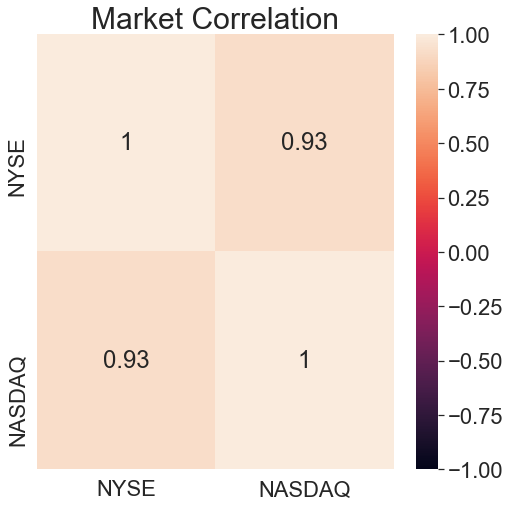

In [8]:
plt.figure(figsize=(8,8))
mcorr = markets.corr()
sns.set(font_scale=2)
sns.heatmap(mcorr, annot=True, vmin=-1)
plt.title('Market Correlation', size=30)

plt.show()

A correlation analysis reveals that overall an r2 value of **.93** exists between the indexes, confirming that even through unstable markets a direct relationship exists between the NASDAQ and NYSE: when one moves, the other moves with it in almost the exact same direction.

As this project seeks to address market behavior during periods of instability, relationship data between the NYSE and NASDAQ are sufficiently established.

Which brings us to our last variable: the gold.

# The Gold

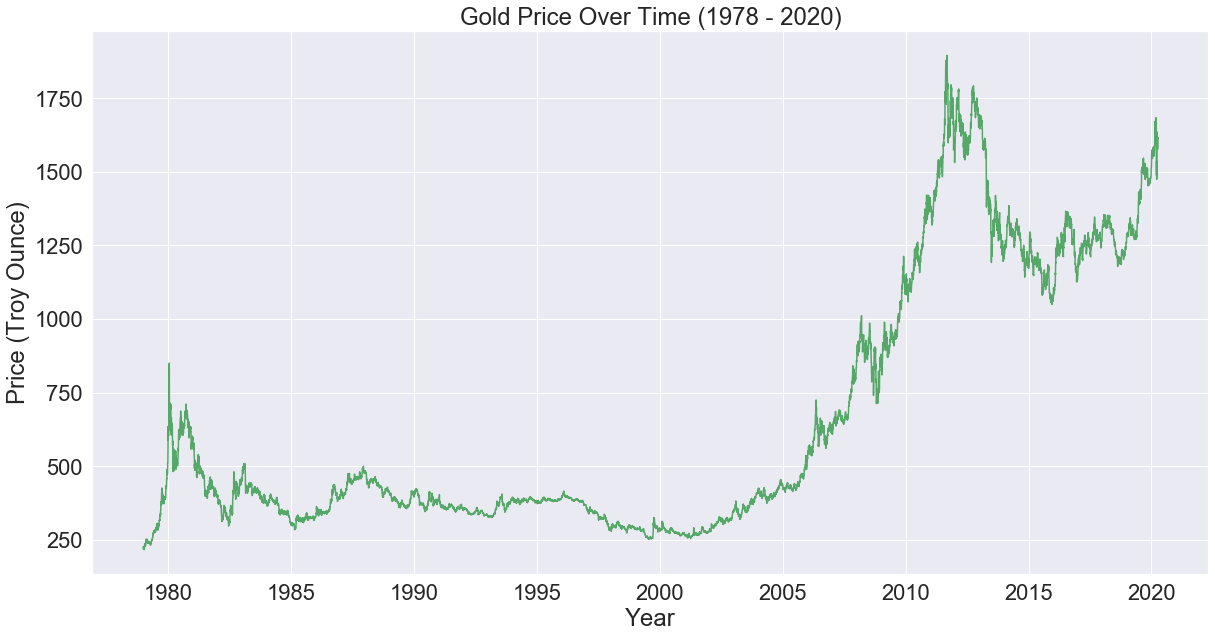

In [9]:
plt.figure(figsize=(20,10))
plt.title("Gold Price Over Time (1978 - 2020)")
plt.xlabel("Year")
plt.ylabel("Price (Troy Ounce)")
plt.plot(gold, 'g')
plt.show()

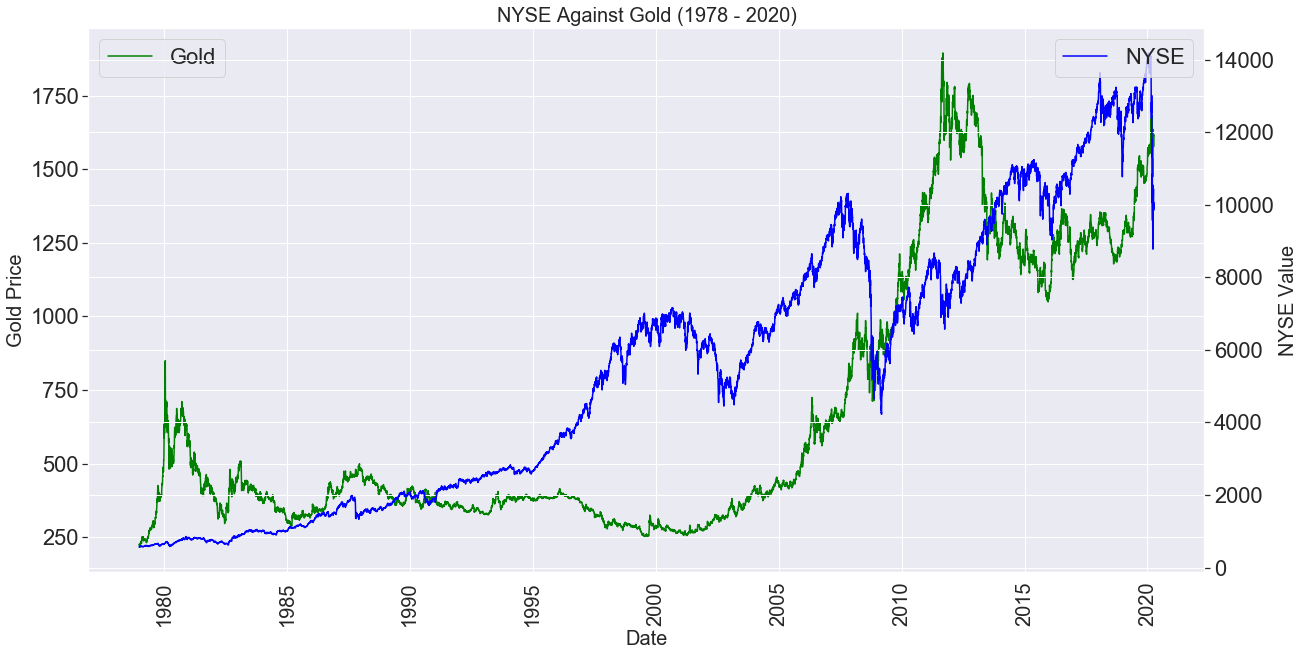

In [52]:
fig, ax1 = plt.subplots(figsize=(20,10))

fa = ax1.plot(gold, color='green', label='Gold')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=20)
ax1.set_ylabel("Gold Price", size=20)
axtwo = ax1.twinx()
plt.title("NYSE Against Gold (1978 - 2020)", size=20)
sa = axtwo.plot(markets['NYSE'], color='blue', label='NYSE')
axtwo.set_ylabel("NYSE Value", size=20)
ax1.legend(loc='upper left')
axtwo.legend(loc='upper right')
plt.show()

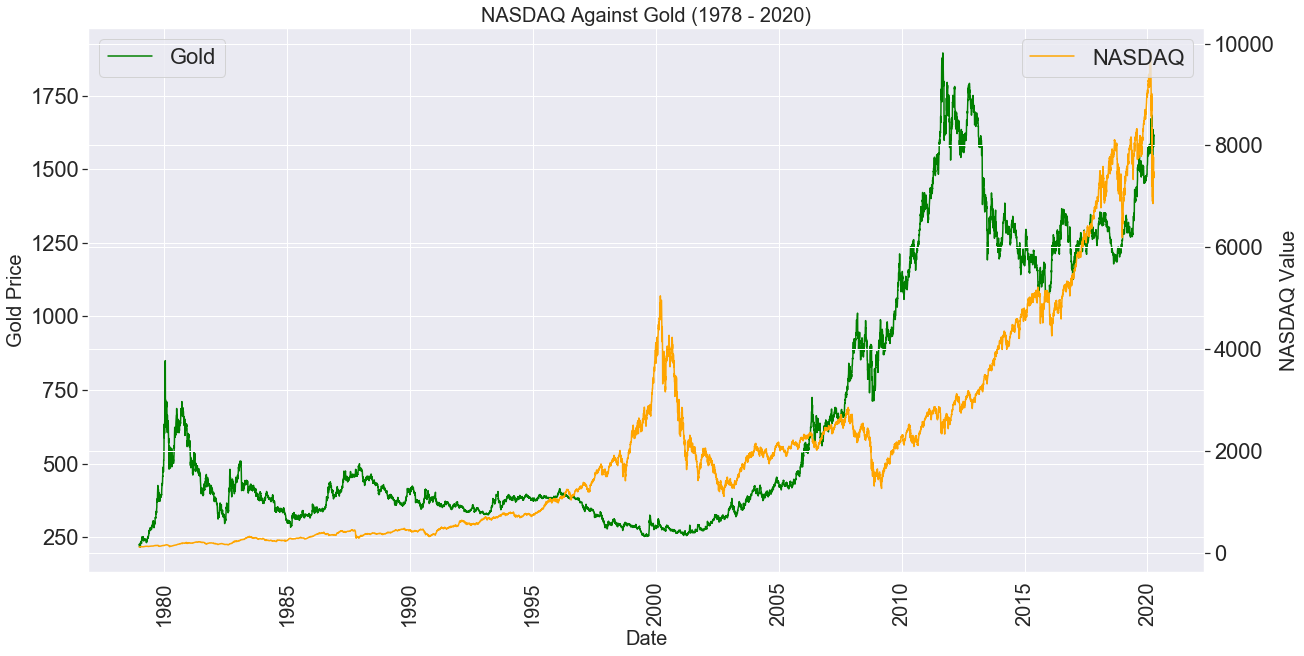

In [66]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(gold, color='green', label='Gold')
plt.legend(loc='upper left')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=20)
ax1.set_ylabel("Gold Price", size=20)
axtwo = ax1.twinx()
plt.title("NASDAQ Against Gold (1978 - 2020)", size=20)
axtwo.plot(markets['NASDAQ'], color='orange', label='NASDAQ')
plt.legend(loc='upper right')
axtwo.set_ylabel("NASDAQ Value", size=20)

plt.show()

While not as linear as the other two market indexes, the Gold price follows the same upward trend, though not as directly. A correlation analysis of the values between them will confirm this trend.

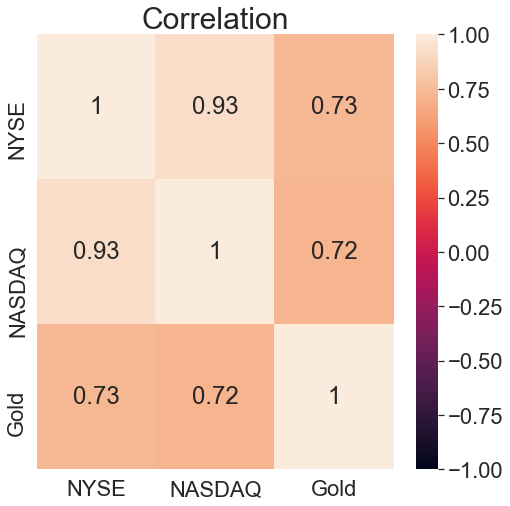

In [12]:
plt.figure(figsize=(8,8))
pcorr = prices.corr()
sns.heatmap(pcorr, annot=True, vmin=-1)
plt.title('Correlation', size=30)

plt.show()

With an r2 value of **.72 and .73**, we can safely proceed with our analysis, in the light of a strong relationship between the NASDAQ, NYSE, and Gold price.

As this capstone seeks to analyze this relationship during unstable markets, let us now see how the price of gold compares against these two markets during the six identified markets.

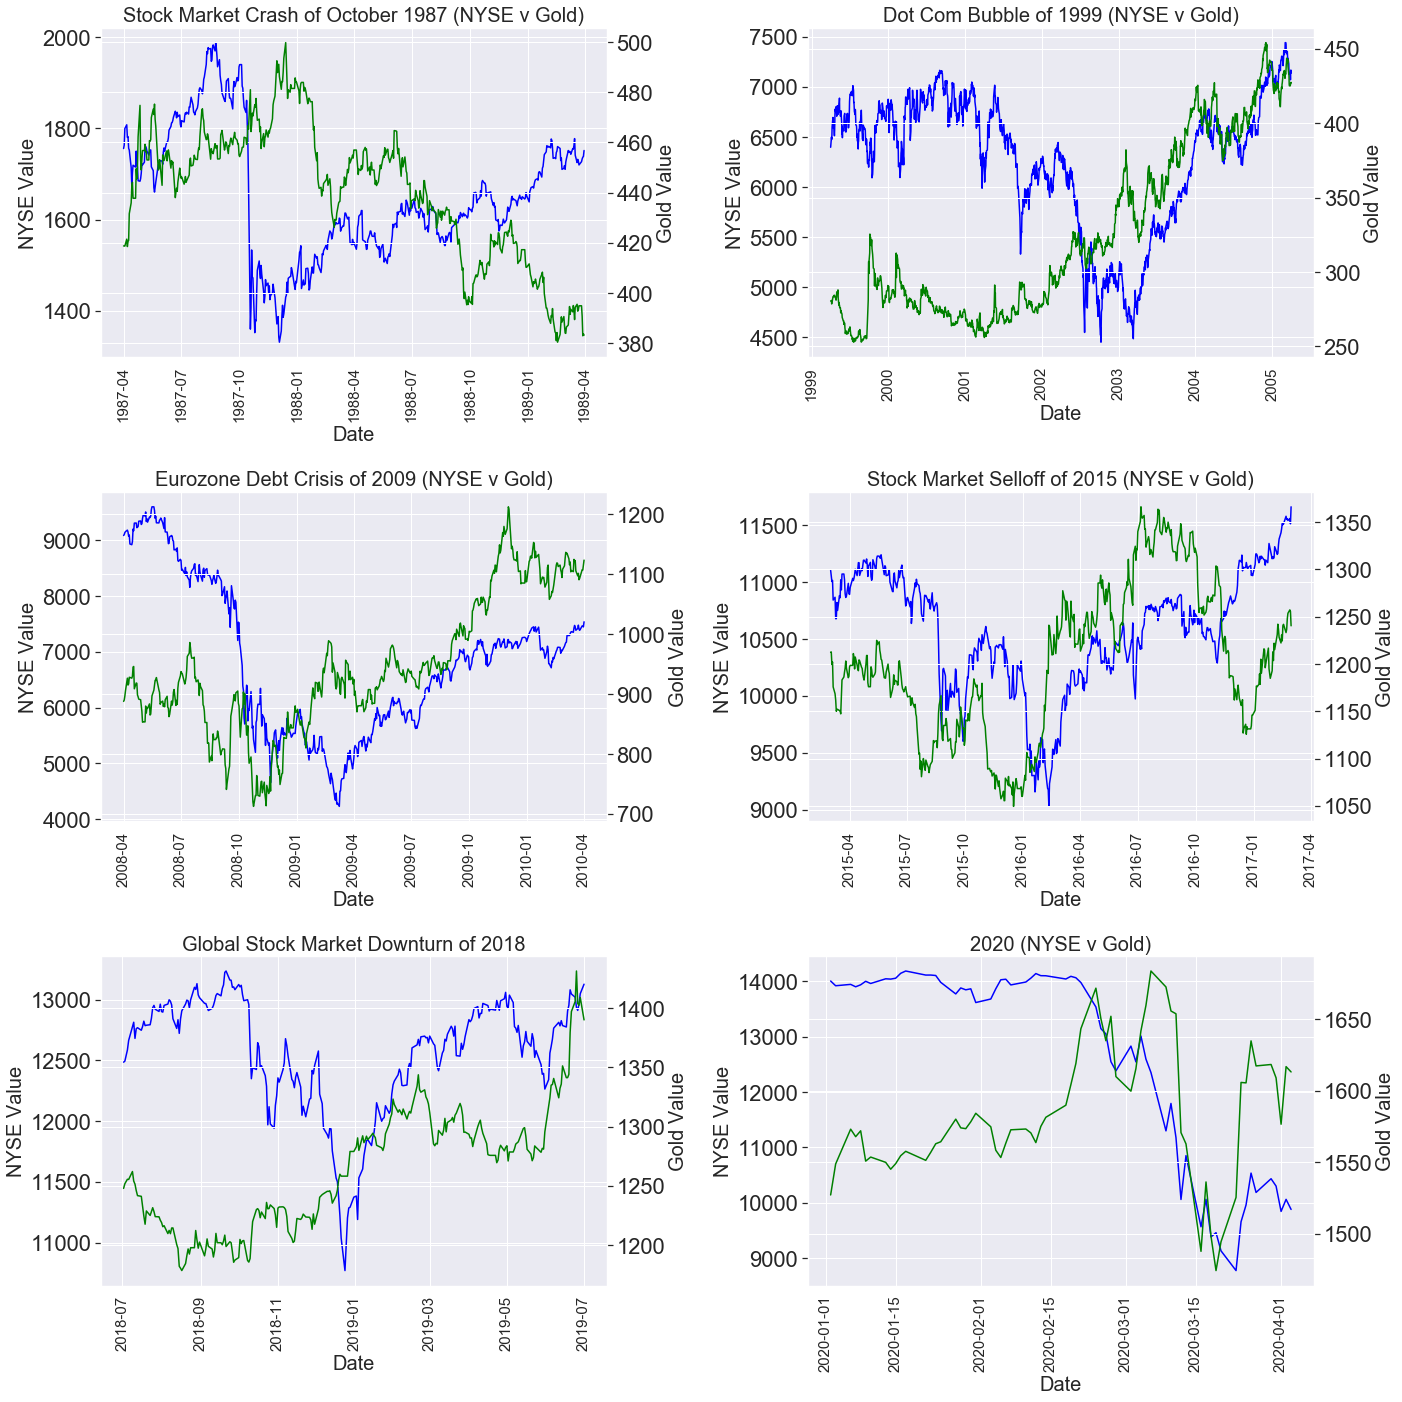

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))

ax1.plot(bm['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NYSE Value", size=20)
axa = ax1.twinx()
plt.title("Stock Market Crash of October 1987 (NYSE v Gold)", size=20)
axa.plot(bm['Gold'], color='green')
axa.set_ylabel("Gold Value", size=20)

ax2.plot(dcb['NYSE'], color='blue')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NYSE Value", size=20)
axb = ax2.twinx()
plt.title("Dot Com Bubble of 1999 (NYSE v Gold)", size=20)
axb.plot(dcb['Gold'], color='green')
axb.set_ylabel("Gold Value", size=20)

ax3.plot(euro['NYSE'], color='blue')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NYSE Value", size=20)
axc = ax3.twinx()
plt.title("Eurozone Debt Crisis of 2009 (NYSE v Gold)", size=20)
axc.plot(euro['Gold'], color='green')
axc.set_ylabel("Gold Value", size=20)

ax4.plot(ms15['NYSE'], color='blue')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NYSE Value", size=20)
axd = ax4.twinx()
plt.title("Stock Market Selloff of 2015 (NYSE v Gold)", size=20)
axd.plot(ms15['Gold'], color='green')
axd.set_ylabel("Gold Value", size=20)

ax5.plot(gd18['NYSE'], color='blue')
ax5.set_xlabel("Date", size=20)
ax5.set_xticklabels(prices.index, rotation=90, size=15)
ax5.set_ylabel("NYSE Value", size=20)
axe = ax5.twinx()
plt.title("Global Stock Market Downturn of 2018", size=20)
axe.plot(gd18['Gold'], color='green')
axe.set_ylabel("Gold Value", size=20)

ax6.plot(covid['NYSE'], color='blue')
ax6.set_xlabel("Date", size=20)
ax6.set_xticklabels(prices.index, rotation=90, size=15)
ax6.set_ylabel("NYSE Value", size=20)
axf = ax6.twinx()
plt.title("2020 (NYSE v Gold)", size=20)
axf.plot(covid['Gold'], color='green')
axf.set_ylabel("Gold Value", size=20)

plt.tight_layout()
plt.show()

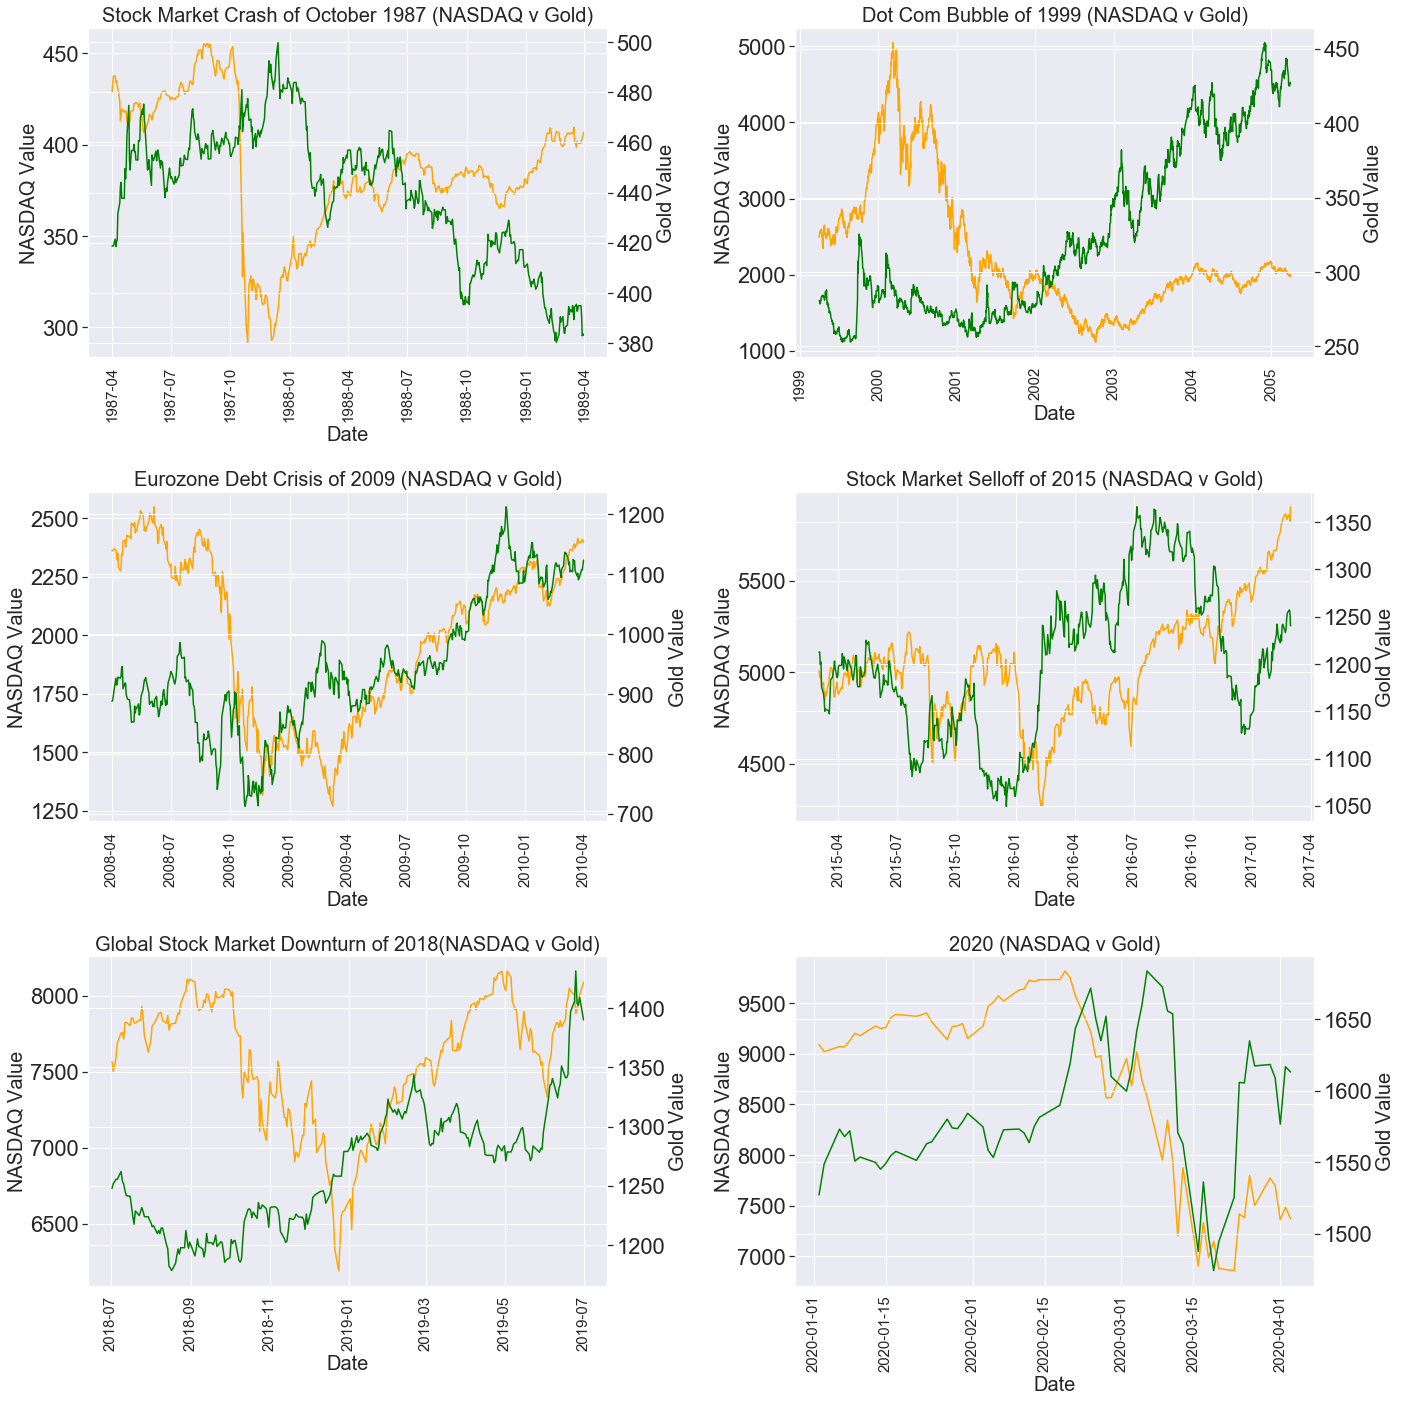

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))

ax1.plot(bm['NASDAQ'], color='orange')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NASDAQ Value", size=20)
axa = ax1.twinx()
plt.title("Stock Market Crash of October 1987 (NASDAQ v Gold)", size=20)
axa.plot(bm['Gold'], color='green')
axa.set_ylabel("Gold Value", size=20)

ax2.plot(dcb['NASDAQ'], color='orange')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NASDAQ Value", size=20)
axb = ax2.twinx()
plt.title("Dot Com Bubble of 1999 (NASDAQ v Gold)", size=20)
axb.plot(dcb['Gold'], color='green')
axb.set_ylabel("Gold Value", size=20)

ax3.plot(euro['NASDAQ'], color='orange')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NASDAQ Value", size=20)
axc = ax3.twinx()
plt.title("Eurozone Debt Crisis of 2009 (NASDAQ v Gold)", size=20)
axc.plot(euro['Gold'], color='green')
axc.set_ylabel("Gold Value", size=20)

ax4.plot(ms15['NASDAQ'], color='orange')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NASDAQ Value", size=20)
axd = ax4.twinx()
plt.title("Stock Market Selloff of 2015 (NASDAQ v Gold)", size=20)
axd.plot(ms15['Gold'], color='green')
axd.set_ylabel("Gold Value", size=20)

ax5.plot(gd18['NASDAQ'], color='orange')
ax5.set_xlabel("Date", size=20)
ax5.set_xticklabels(prices.index, rotation=90, size=15)
ax5.set_ylabel("NASDAQ Value", size=20)
axe = ax5.twinx()
plt.title("Global Stock Market Downturn of 2018(NASDAQ v Gold)", size=20)
axe.plot(gd18['Gold'], color='green')
axe.set_ylabel("Gold Value", size=20)

ax6.plot(covid['NASDAQ'], color='orange')
ax6.set_xlabel("Date", size=20)
ax6.set_xticklabels(prices.index, rotation=90, size=15)
ax6.set_ylabel("NASDAQ Value", size=20)
axf = ax6.twinx()
plt.title("2020 (NASDAQ v Gold)", size=20)
axf.plot(covid['Gold'], color='green')
axf.set_ylabel("Gold Value", size=20)

plt.tight_layout()
plt.show()

Surprisingly, gold prices seem to move almost against the market variations. At various points the price of gold moves in the opposite direction as market trends during these times of uncertainty. A correlation analysis should be performed for each of these events to determine how the price of gold changes to reflect these events.

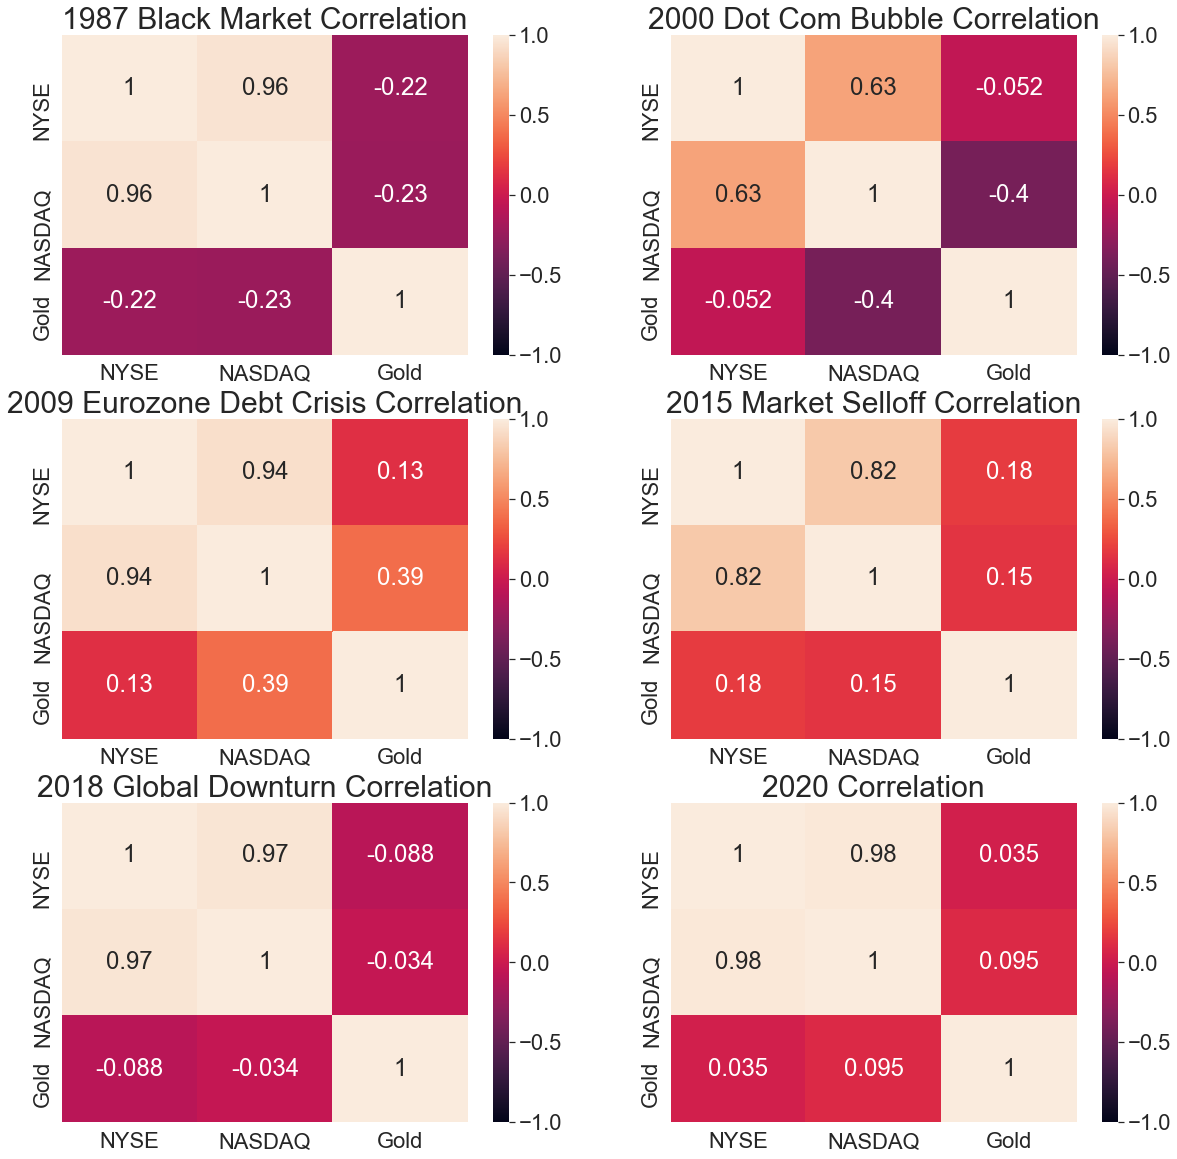

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.set(font_scale=2)
bmcorr = bm.corr()
sns.heatmap(bmcorr, annot=True, vmin=-1)
plt.title('1987 Black Market Correlation', size=30)

plt.subplot(3,2,2)
dcbcorr = dcb.corr()
sns.heatmap(dcbcorr, annot=True, vmin=-1)
plt.title('2000 Dot Com Bubble Correlation', size=30)

plt.subplot(3,2,3)
eucorr = euro.corr()
sns.heatmap(eucorr, annot=True, vmin=-1)
plt.title('2009 Eurozone Debt Crisis Correlation', size=30)

plt.subplot(3,2,4)
mscorr = ms15.corr()
sns.heatmap(mscorr, annot=True, vmin=-1)
plt.title('2015 Market Selloff Correlation', size=30)

plt.subplot(3,2,5)
gdcorr = gd18.corr()
sns.heatmap(gdcorr, annot=True, vmin=-1)
plt.title('2018 Global Downturn Correlation', size=30)

plt.subplot(3,2,6)
cocorr = covid.corr()
sns.heatmap(cocorr, annot=True, vmin=-1)
plt.title('2020 Correlation', size=30)

plt.show()

While the general pattern of gold price follows general market growth, during times of market uncertainty that pattern breaks absolutely. The r2 value for the price of gold at each specific event fluctuates wildly, from **.39** during the 09 Eurozone Debt Crisis to as low as **-.40** during the 99 Dot Com Bubble.

For the 2020 market instability, this correlation is close to 0, suggesting that gold is fluctuating completely independently of what either market indexes are doing.

In [16]:
gbmax = bm['Gold'].max()
gbmin = bm['Gold'].min()
gbmdif = gbmax - gbmin
gbmper = round((gbmdif/gbmax)*100,2)
print ("Gold 87 BM % CHANGE:", gbmper)

gdcmax = dcb['Gold'].max()
gdcmin = dcb['Gold'].min()
gdcdif = gdcmin - gdcmax
gdcper = round((gdcdif/gdcmax)*100,2)
print ("Gold 99 DCB % CHANGE:", gdcper)

geumax = euro['Gold'].max()
geumin = euro['Gold'].min()
geudif = geumin - geumax
geuper = round((geudif/geumax)*100,2)
print ("Gold 09 EU % CHANGE:", geuper)

g15max = ms15['Gold'].max()
g15min = ms15['Gold'].min()
g15dif = g15min - g15max
g15per = round((g15dif/g15max)*100,2)
print ("Gold 15 MS % CHANGE:", g15per)

g18max = gd18['Gold'].max()
g18min = gd18['Gold'].min()
g18dif = gbmin - gbmax
g18per = round((g18dif/g18max)*100,2)
print ("Gold 18 GD % CHANGE:", g18per)

gper = round(np.mean([gbmper, gdcper, geuper, g15per, g18per]),2)
print("Gold PRIOR AVG % CHANGE:", gper)

gcomax = covid['Gold'].max()
gcomin = covid['Gold'].min()
gcodif = gcomax - gcomin
gcoper = round((gcodif/gcomax)*100,2)
print ("Gold 2020 % CHANGE:", gcoper)

gperall = round(np.mean([gbmper, gdcper, geuper, g15per, g18per, gcoper]),2)
print("Gold NEW AVG % CHANGE:", gperall)

Gold 87 BM % CHANGE: 23.88
Gold 99 DCB % CHANGE: -44.34
Gold 09 EU % CHANGE: -41.24
Gold 15 MS % CHANGE: -23.19
Gold 18 GD % CHANGE: -8.34
Gold PRIOR AVG % CHANGE: -18.65
Gold 2020 % CHANGE: 12.44
Gold NEW AVG % CHANGE: -13.47


# Inferential Statistics

# Rolling Standard Deviation

Let's take a more focused look on a good measure of these price variations by analyzing **rolling standard deviation.**

We'll create formulas for rolling standard deviation with a window size of 30 as a way of capturing a month's worth of data.

We will also be looking to apply the standard deviation formula to the six market crashes and comparing each one.

In [94]:
proll = prices.rolling(365).std()
mroll = markets.rolling(365).std()
groll = gold.rolling(365).std()

bmroll = bm.rolling(30).std()
dcbroll = dcb.rolling(30).std()
euroll = euro.rolling(30).std()
msroll = ms15.rolling(30).std()
gdroll = gd18.rolling(30).std()
coroll = covid.rolling(30).std()

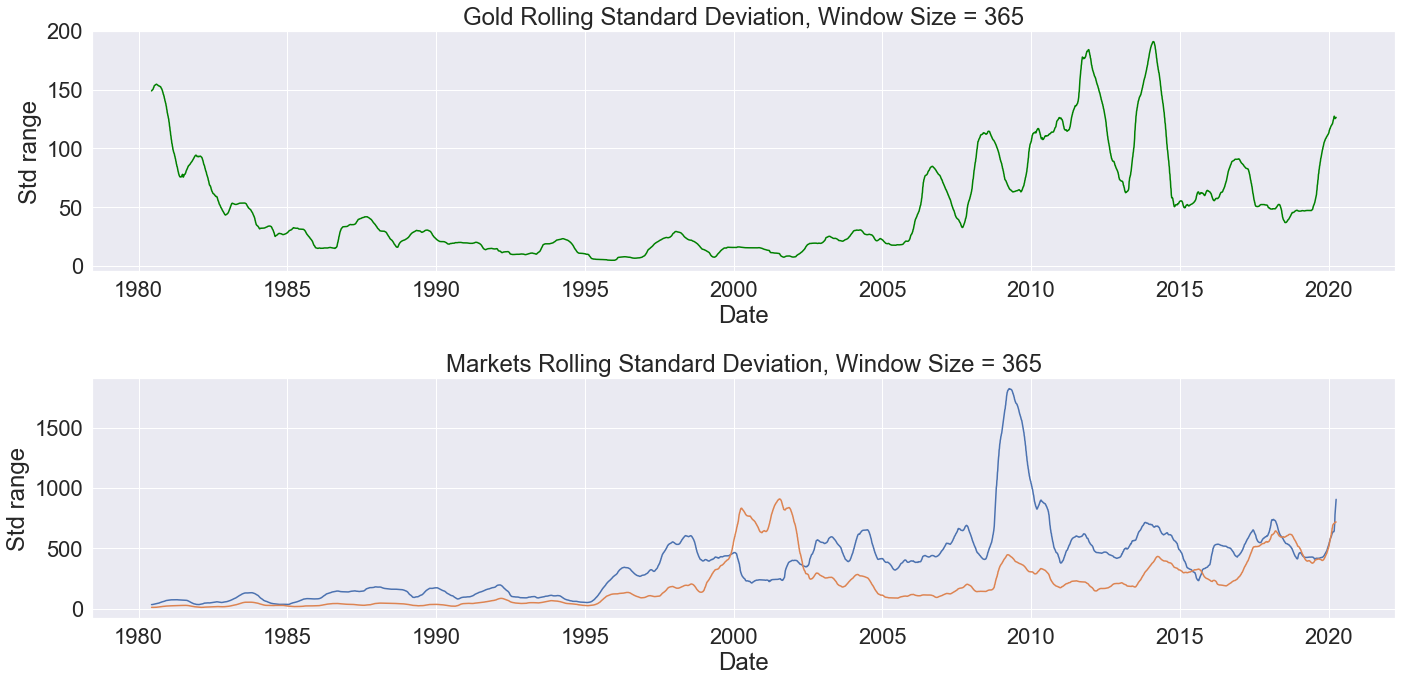

In [90]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(groll, 'green')
plt.title("Gold Rolling Standard Deviation, Window Size = 365")
plt.xlabel("Date")
plt.ylabel("Std range")

plt.subplot(2,1,2)
plt.plot(mroll)
plt.title("Markets Rolling Standard Deviation, Window Size = 365")
plt.xlabel("Date")
plt.ylabel("Std range")
plt.tight_layout()
plt.show()

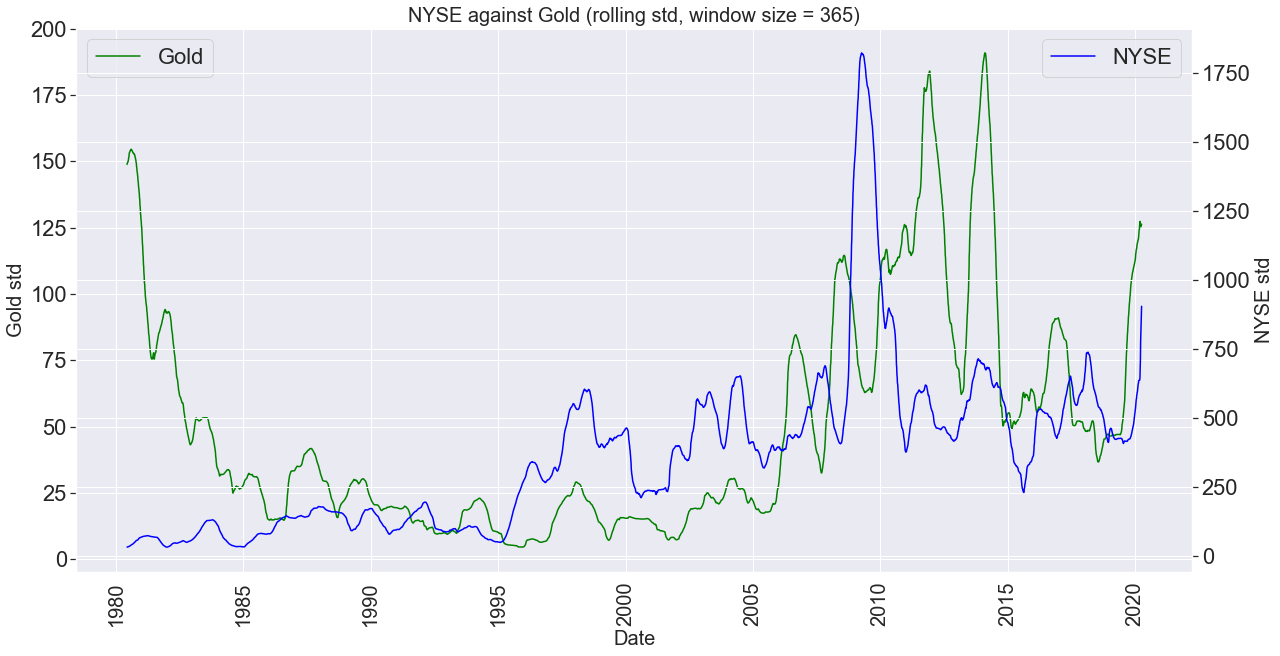

In [98]:
fig, ax1 = plt.subplots(figsize=(20,10))

fa = ax1.plot(groll, color='green', label='Gold')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=20)
ax1.set_ylabel("Gold std", size=20)
axtwo = ax1.twinx()
plt.title("NYSE against Gold (rolling std, window size = 365)", size=20)
sa = axtwo.plot(mroll['NYSE'], color='blue', label='NYSE')
axtwo.set_ylabel("NYSE std", size=20)
ax1.legend(loc='upper left')
axtwo.legend(loc='upper right')
plt.show()

In [99]:
prollcorr = proll.corr()
mrollcorr = mroll.corr()
grollcorr = groll.corr()

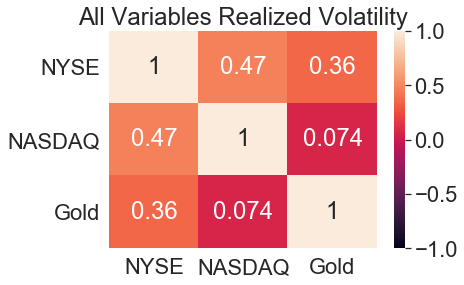

In [105]:
sns.heatmap(prollcorr, annot=True, vmin=-1)
plt.title("All Variables Realized Volatility")
plt.show()

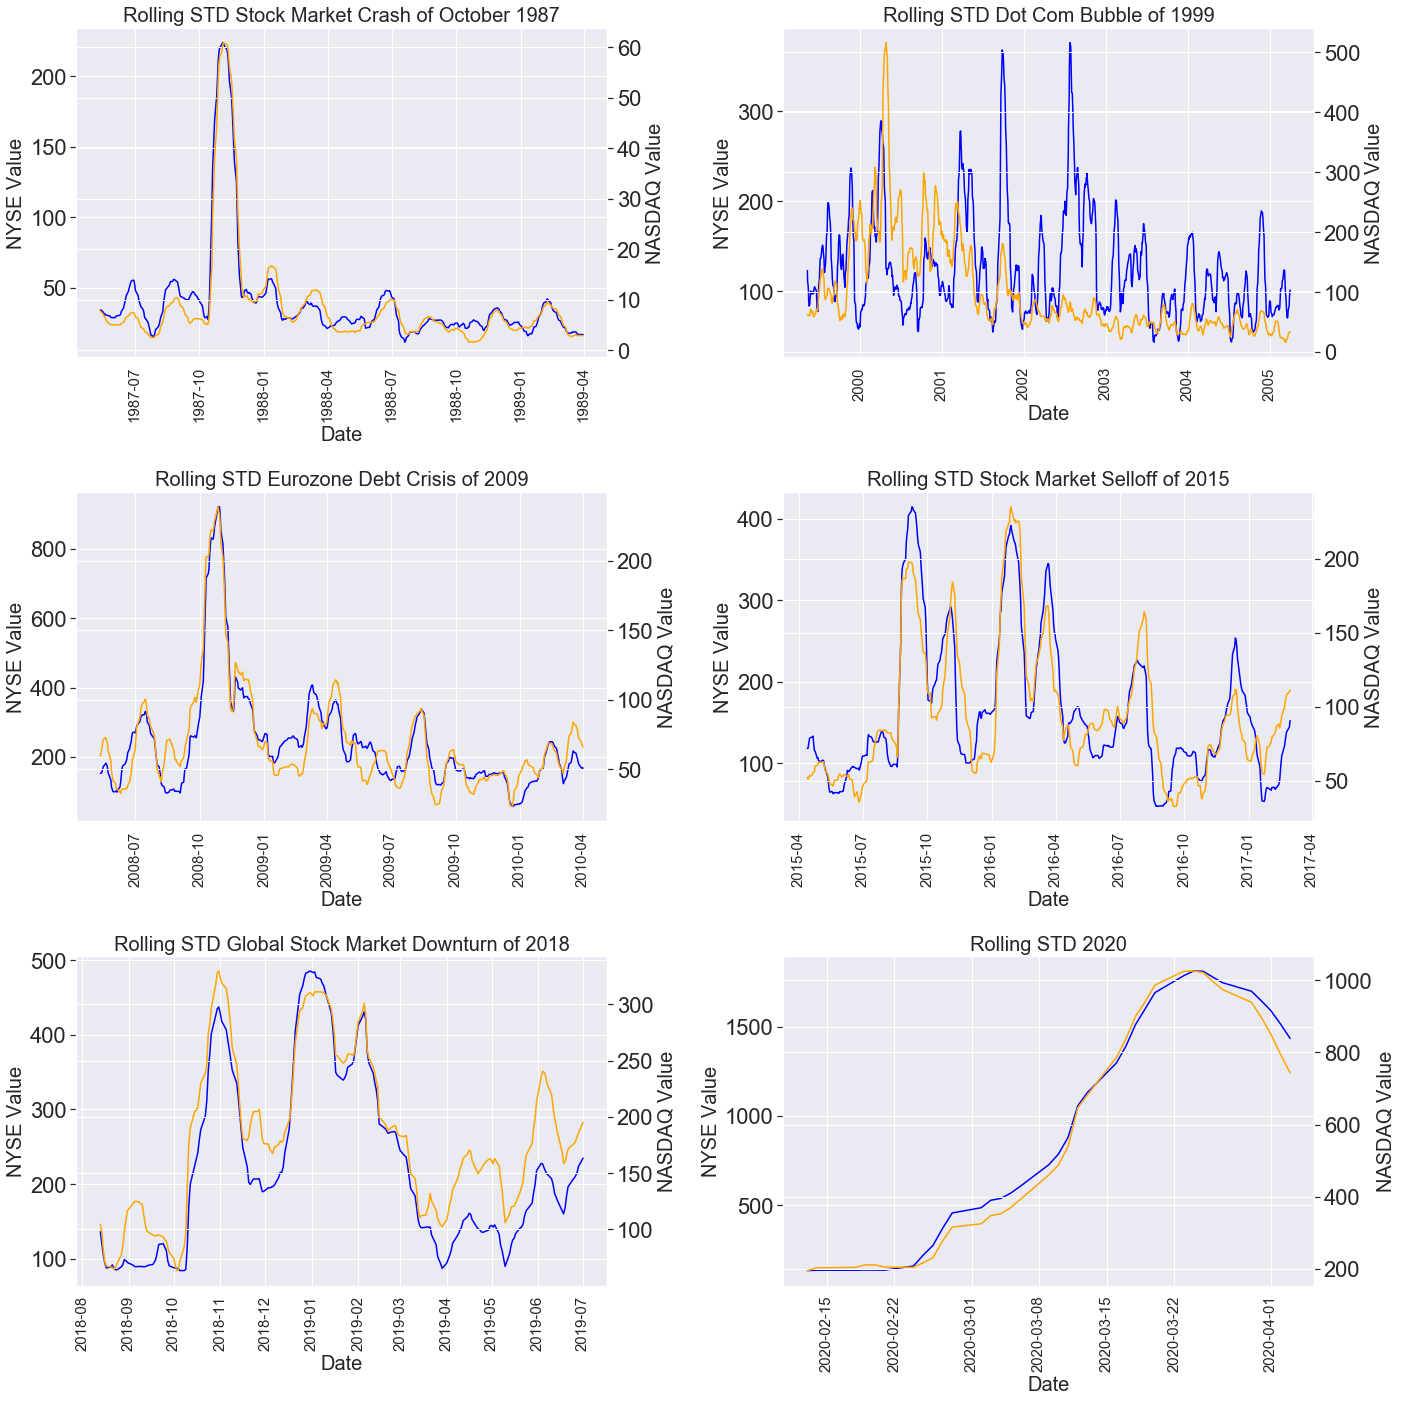

In [95]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))

ax1.plot(bmroll['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NYSE Value", size=20)
axa = ax1.twinx()
plt.title("Rolling STD Stock Market Crash of October 1987", size=20)
axa.plot(bmroll['NASDAQ'], color='orange')
axa.set_ylabel("NASDAQ Value", size=20)

ax2.plot(dcbroll['NYSE'], color='blue')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NYSE Value", size=20)
axb = ax2.twinx()
plt.title("Rolling STD Dot Com Bubble of 1999", size=20)
axb.plot(dcbroll['NASDAQ'], color='orange')
axb.set_ylabel("NASDAQ Value", size=20)

ax3.plot(euroll['NYSE'], color='blue')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NYSE Value", size=20)
axc = ax3.twinx()
plt.title("Rolling STD Eurozone Debt Crisis of 2009", size=20)
axc.plot(euroll['NASDAQ'], color='orange')
axc.set_ylabel("NASDAQ Value", size=20)

ax4.plot(msroll['NYSE'], color='blue')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NYSE Value", size=20)
axd = ax4.twinx()
plt.title("Rolling STD Stock Market Selloff of 2015", size=20)
axd.plot(msroll['NASDAQ'], color='orange')
axd.set_ylabel("NASDAQ Value", size=20)

ax5.plot(gdroll['NYSE'], color='blue')
ax5.set_xlabel("Date", size=20)
ax5.set_xticklabels(prices.index, rotation=90, size=15)
ax5.set_ylabel("NYSE Value", size=20)
axe = ax5.twinx()
plt.title("Rolling STD Global Stock Market Downturn of 2018", size=20)
axe.plot(gdroll['NASDAQ'], color='orange')
axe.set_ylabel("NASDAQ Value", size=20)

ax6.plot(coroll['NYSE'], color='blue')
ax6.set_xlabel("Date", size=20)
ax6.set_xticklabels(prices.index, rotation=90, size=15)
ax6.set_ylabel("NYSE Value", size=20)
axf = ax6.twinx()
plt.title("Rolling STD 2020", size=20)
axf.plot(coroll['NASDAQ'], color='orange')
axf.set_ylabel("NASDAQ Value", size=20)

plt.tight_layout()
plt.show()

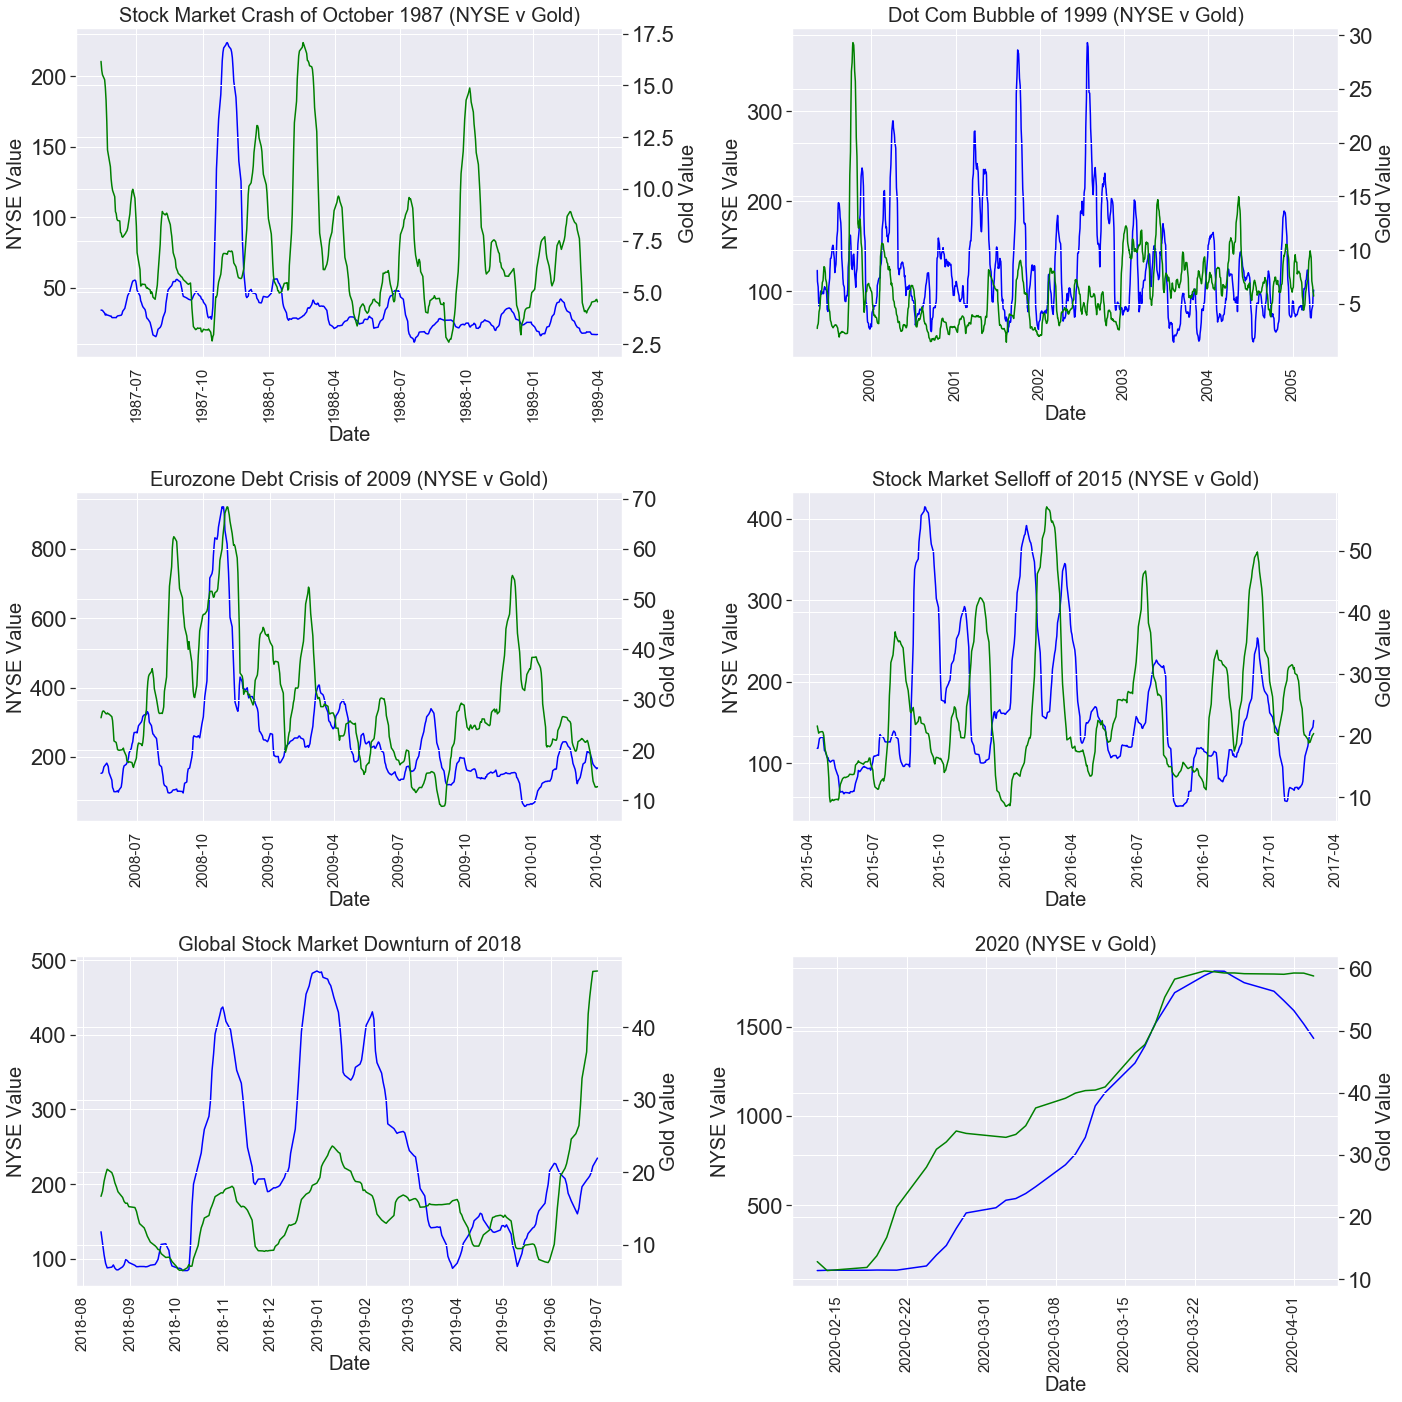

In [96]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,20))

ax1.plot(bmroll['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NYSE Value", size=20)
axa = ax1.twinx()
plt.title("Stock Market Crash of October 1987 (NYSE v Gold)", size=20)
axa.plot(bmroll['Gold'], color='green')
axa.set_ylabel("Gold Value", size=20)

ax2.plot(dcbroll['NYSE'], color='blue')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NYSE Value", size=20)
axb = ax2.twinx()
plt.title("Dot Com Bubble of 1999 (NYSE v Gold)", size=20)
axb.plot(dcbroll['Gold'], color='green')
axb.set_ylabel("Gold Value", size=20)

ax3.plot(euroll['NYSE'], color='blue')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NYSE Value", size=20)
axc = ax3.twinx()
plt.title("Eurozone Debt Crisis of 2009 (NYSE v Gold)", size=20)
axc.plot(euroll['Gold'], color='green')
axc.set_ylabel("Gold Value", size=20)

ax4.plot(msroll['NYSE'], color='blue')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NYSE Value", size=20)
axd = ax4.twinx()
plt.title("Stock Market Selloff of 2015 (NYSE v Gold)", size=20)
axd.plot(msroll['Gold'], color='green')
axd.set_ylabel("Gold Value", size=20)

ax5.plot(gdroll['NYSE'], color='blue')
ax5.set_xlabel("Date", size=20)
ax5.set_xticklabels(prices.index, rotation=90, size=15)
ax5.set_ylabel("NYSE Value", size=20)
axe = ax5.twinx()
plt.title("Global Stock Market Downturn of 2018", size=20)
axe.plot(gdroll['Gold'], color='green')
axe.set_ylabel("Gold Value", size=20)

ax6.plot(coroll['NYSE'], color='blue')
ax6.set_xlabel("Date", size=20)
ax6.set_xticklabels(prices.index, rotation=90, size=15)
ax6.set_ylabel("NYSE Value", size=20)
axf = ax6.twinx()
plt.title("2020 (NYSE v Gold)", size=20)
axf.plot(coroll['Gold'], color='green')
axf.set_ylabel("Gold Value", size=20)

plt.tight_layout()
plt.show()

While each market index has drastic variations in standard deviation, during each of these crises the standard deviation of gold is **almost negligible,** which means that over the period of one month during times of market instability, the volatility of gold is very low.

This suggests that even though the market may be unstable, the price of gold remains firm.

While both the NYSE and Gold have noticeable curves in their rolling standard deviation measurements during unstable markets, the variations in gold price are not as significant in terms of rawn numerical variations as the market index. This lower standard deviation suggests gold is less prone to significant increases or decreases, even during times of high volatility.

In [20]:
bmrollcorr = bmroll.corr()
dcbrollcorr = dcbroll.corr()
eurollcorr = euroll.corr()
msrollcorr = msroll.corr()
gdrollcorr = gdroll.corr()
corollcorr = coroll.corr()

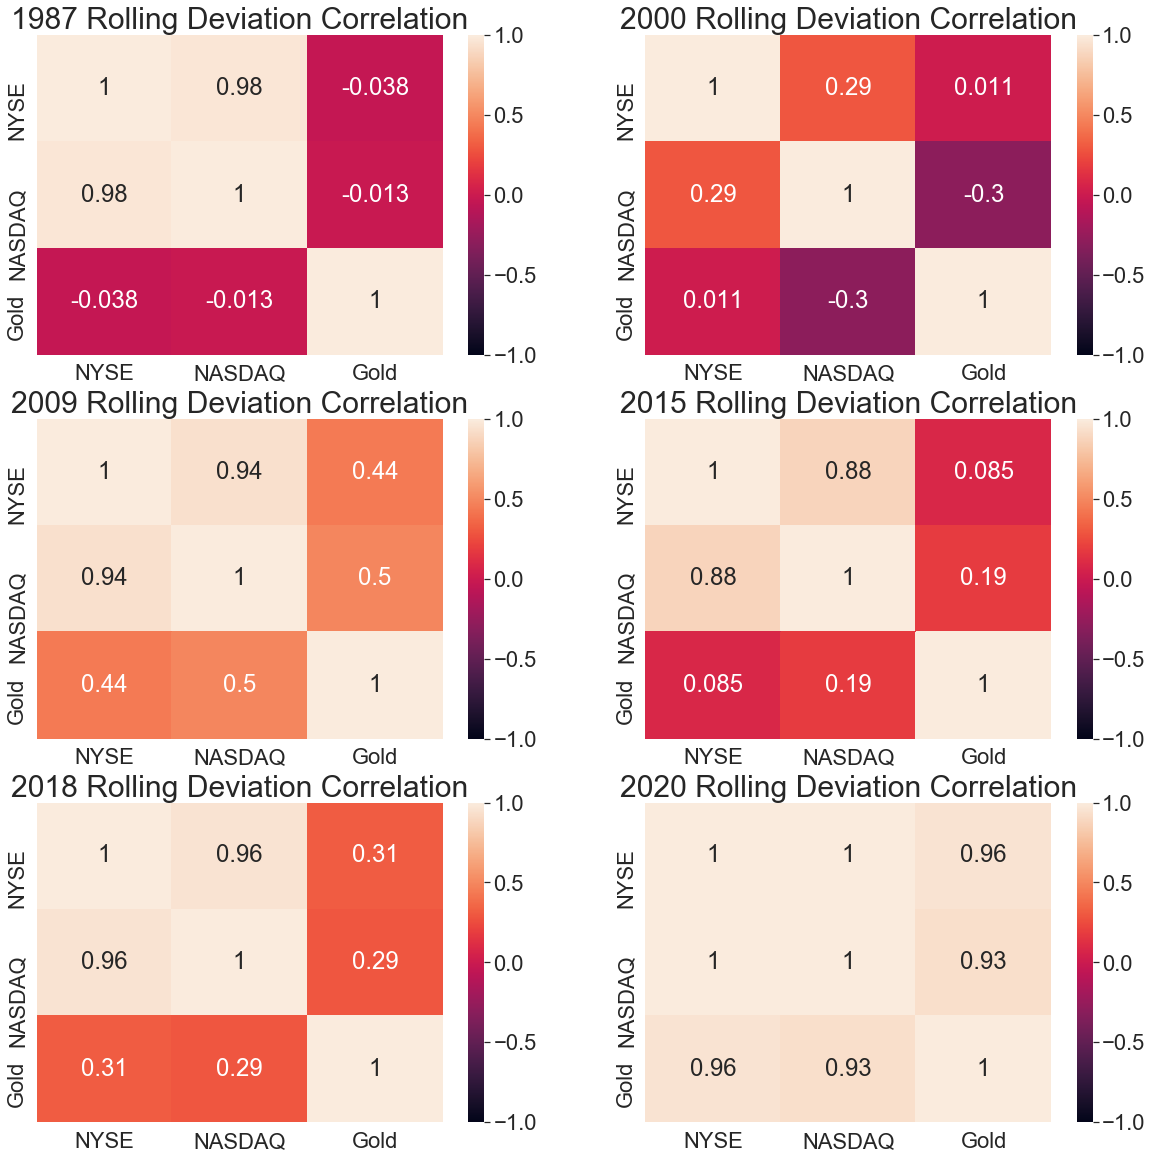

In [21]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.heatmap(bmrollcorr, annot=True, vmin=-1)
plt.title('1987 Rolling Deviation Correlation', size=30)

plt.subplot(3,2,2)
sns.heatmap(dcbrollcorr, annot=True, vmin=-1)
plt.title('2000 Rolling Deviation Correlation', size=30)

plt.subplot(3,2,3)
sns.heatmap(eurollcorr, annot=True, vmin=-1)
plt.title('2009 Rolling Deviation Correlation', size=30)

plt.subplot(3,2,4)
sns.heatmap(msrollcorr, annot=True, vmin=-1)
plt.title('2015 Rolling Deviation Correlation', size=30)

plt.subplot(3,2,5)
sns.heatmap(gdrollcorr, annot=True, vmin=-1)
plt.title('2018 Rolling Deviation Correlation', size=30)

plt.subplot(3,2,6)
sns.heatmap(corollcorr, annot=True, vmin=-1)
plt.title('2020 Rolling Deviation Correlation', size=30)

plt.show()

Quantifying this realized volatility shows us that during uncertain markets, a less significant affect on the price of gold is seen. Gold may still be highly volatile during these times, but its relationship to the markets diverges quickly.

Exceptionally high volatility is shown in the 2020 comparison for two reasons: one, that there are significantly less data points to analyze (3 months of data as compared to 24 months of data for other years); two, the situation is ongoing, developing on a daily basis as markets speculate.

Like all things, a prediction of human behavior during a crisis is neither a certainty nor a guarantee.

# Insights

While no definitive answer can be concluded as to the nature of gold with respect to the NYSE and NASDAQ market fluctuations, a few key insights can be derived from the analysis performed herein.

1. During times of financial stability, gold prices follow general market upward variations.

 This trend can be explained by inferring that when economies are healthy, a stockpile of gold is sought to ensure future stability during the next unseen crisis.


2. During times of financial instability, gold prices deviate from market trends, often following a negative correlation.

 The concept behind this trend is that while markets are falling, gold is being liquidated to cover losses and maintain personal or financial survivability.


3. Each event of market instability eventually normalizes to pre-crisis levels.

 Thus it can be observed that an investment into gold during a crisis will eventually have a 1:1 return on investment within, on average, 2 years


4. While markets behave similarly during unstable markets, each crisis is different and specific gains and losses are different.

 With respect to unique political, cultural, and economic significances, gold usage by investors in crisis is different at each point.
 

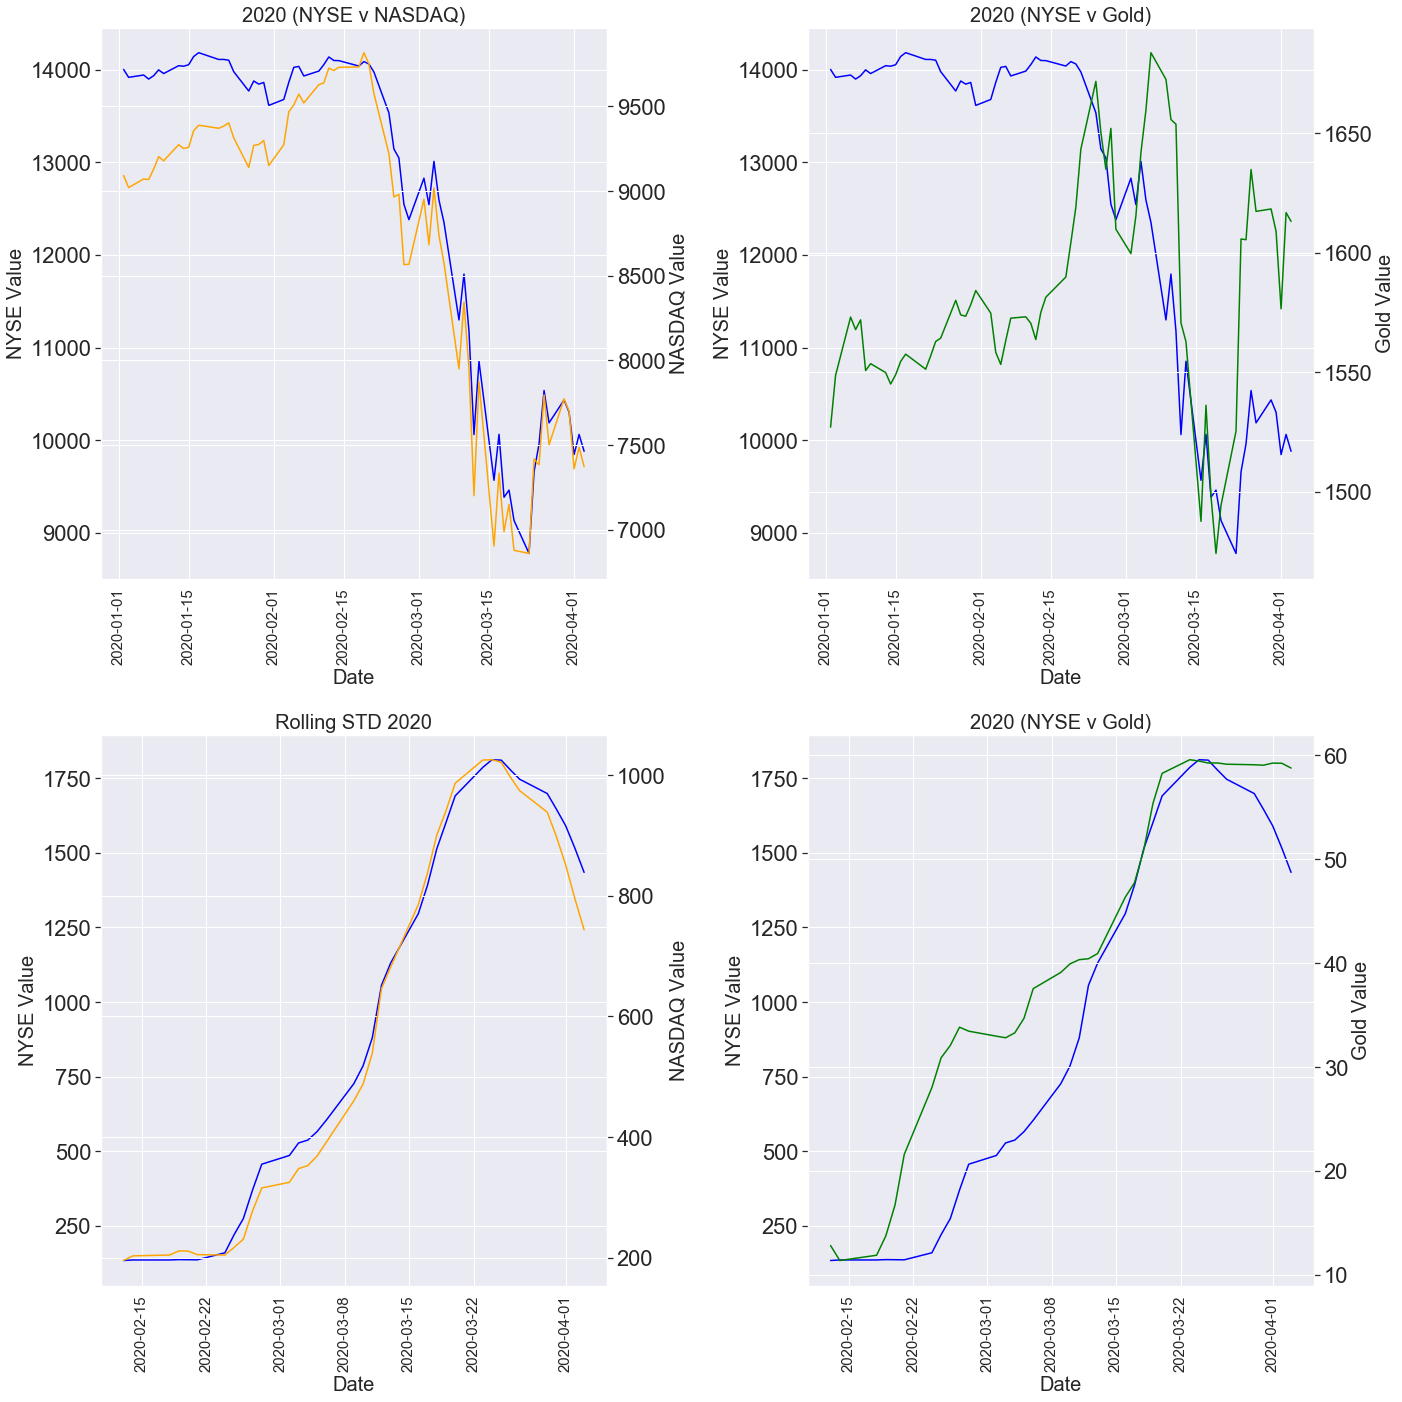

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,20))

ax1.plot(covid['NYSE'], color='blue')
ax1.set_xlabel("Date", size=20)
ax1.set_xticklabels(prices.index, rotation=90, size=15)
ax1.set_ylabel("NYSE Value", size=20)
axa = ax1.twinx()
plt.title("2020 (NYSE v NASDAQ)", size=20)
axa.plot(covid['NASDAQ'], color='orange')
axa.set_ylabel("NASDAQ Value", size=20)

ax2.plot(covid['NYSE'], color='blue')
ax2.set_xlabel("Date", size=20)
ax2.set_xticklabels(prices.index, rotation=90, size=15)
ax2.set_ylabel("NYSE Value", size=20)
axb = ax2.twinx()
plt.title("2020 (NYSE v Gold)", size=20)
axb.plot(covid['Gold'], color='green')
axb.set_ylabel("Gold Value", size=20)

ax3.plot(coroll['NYSE'], color='blue')
ax3.set_xlabel("Date", size=20)
ax3.set_xticklabels(prices.index, rotation=90, size=15)
ax3.set_ylabel("NYSE Value", size=20)
axc = ax3.twinx()
plt.title("Rolling STD 2020", size=20)
axc.plot(coroll['NASDAQ'], color='orange')
axc.set_ylabel("NASDAQ Value", size=20)

ax4.plot(coroll['NYSE'], color='blue')
ax4.set_xlabel("Date", size=20)
ax4.set_xticklabels(prices.index, rotation=90, size=15)
ax4.set_ylabel("NYSE Value", size=20)
axd = ax4.twinx()
plt.title("2020 (NYSE v Gold)", size=20)
axd.plot(coroll['Gold'], color='green')
axd.set_ylabel("Gold Value", size=20)

plt.tight_layout()
plt.show()

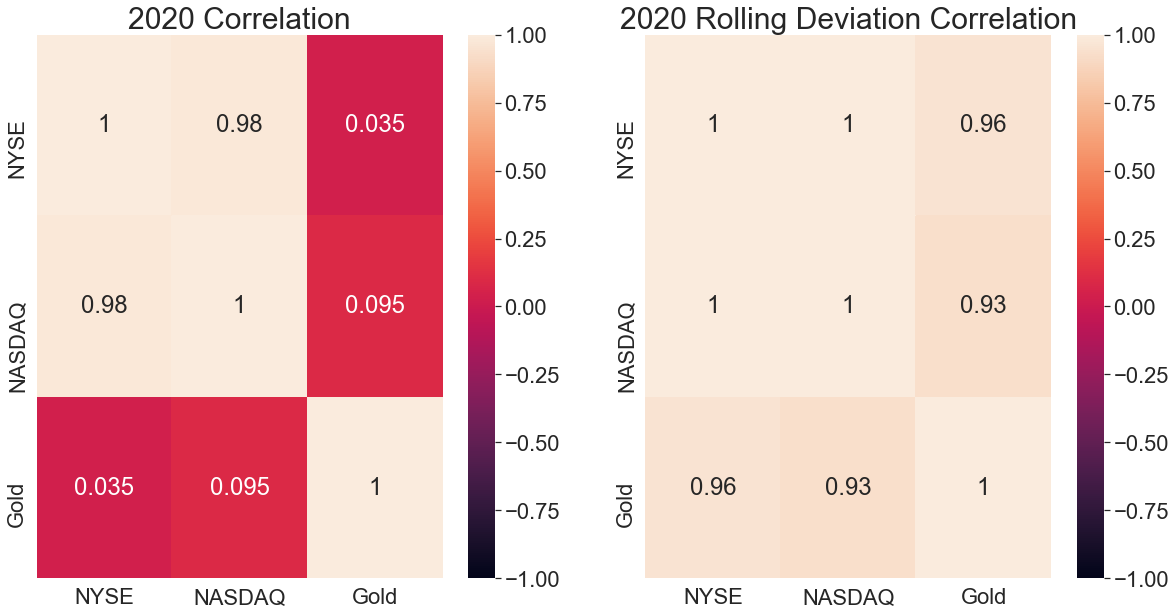

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
cocorr = covid.corr()
sns.heatmap(cocorr, annot=True, vmin=-1)
plt.title('2020 Correlation', size=30)

plt.subplot(1,2,2)
sns.heatmap(corollcorr, annot=True, vmin=-1)
plt.title('2020 Rolling Deviation Correlation', size=30)

plt.show()

# Conclusion

The utilization of gold as a recovery mechanism during 2020's unstable market is uncertain, as no clear pattern has emerged in the data to determine market trend. With this consideration, the current suggestion based on data made available is that **as of current prices, buying gold while the market is unstable would likely return a profit when the market stabilizes and begins recovery**, although this is not a guarantee. More data and statistical analysis should be performed for a more conclusive decision.